<a href="https://colab.research.google.com/github/MarianoChic09/Agentes-Inteligentes/blob/main/Parcial%20de%20Analisis%20Predictivo%20de%20Series%20Temporales%20-%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Predictivo de Series Temporales

## Curso 2023 - Universidad ORT Uruguay

## Parcial - Fecha 13/7/2023

### Nombre del estudiante: Mariano Ezequiel Chicatun.
#### N° de Estudiante 301379



In [1]:
install.packages("astsa")
install.packages("forecast")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(astsa)
library(tseries)
suppressMessages(library(forecast))
options(repr.plot.width=16, repr.plot.height=6)

## Ejercicio 1

Uno de los problemas del mundo actual es el exceso de datos ("too much data" en lugar de "big data"). Una de las razones detrás de este problema es el descenso abrupto en los costos de almacenamiento, medidos en dólares por Gigabyte.

Se dispone de la siguiente serie de evolución de estos costos (mediana anual de precios en un conjunto de fabricantes de 1980 a 2008), almacenada en `cpg`:

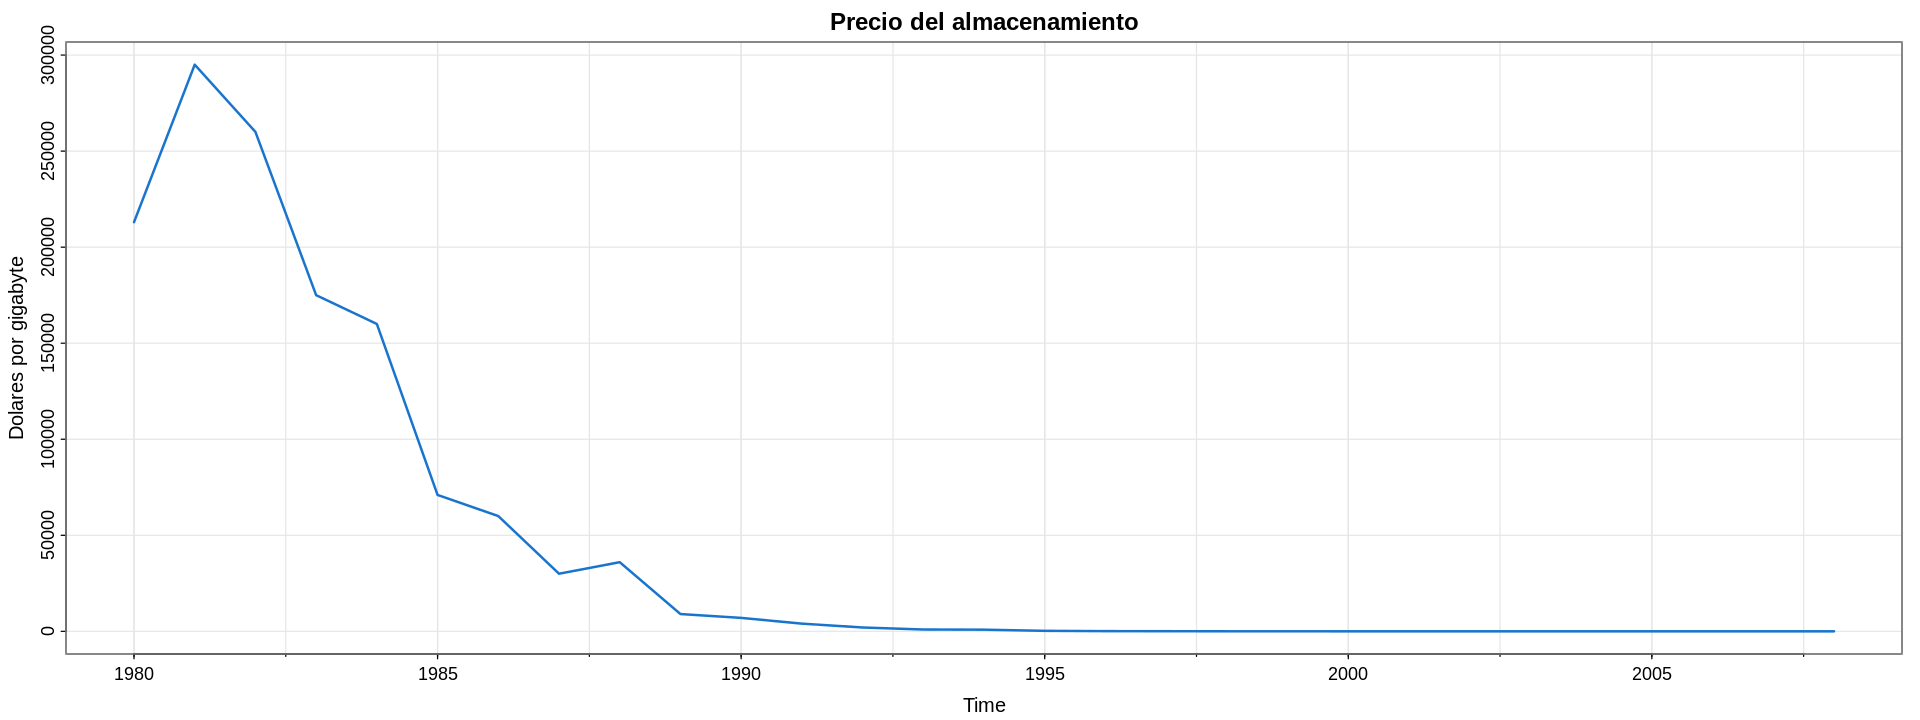

In [3]:
tsplot(cpg, col=4, lwd=2, main="Precio del almacenamiento", ylab="Dolares por gigabyte")

Tratar de ver si es exponencial o no. Que harian con los residuos pero no hacerlo.

1. Describir brevemente la serie observada. Argumentar que la serie presenta aproximadamente un descenso exponencial.
2. Transformar la serie a escala logarítmica $x_t = \log(cpg_t)$ y graficar nuevamente. Comentar lo observado.
3. Realizar una regresión lineal de la forma $x_t = \beta_0 + \beta_1 t$.
4. Graficar los valores ajustados y analizar los residuos y el ajuste obtenido.
5. Se propone agregar un término cuadrático (que corresponde a un decaimiento mayor a exponencial) a la regresión anterior. Realice nuevamente el ajuste y compare con el anterior. ¿Cuál modelo le parece mejor?

In [11]:
t = time(cpg)
t

A Time Series:
 [1] 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
[16] 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008

ACF,0.91,0.82,0.73,0.64,0.53,0.43,0.33
PACF,0.91,-0.03,-0.08,-0.08,-0.11,-0.02,-0.12



	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -2.2023, Lag order = 3, p-value = 0.4951
alternative hypothesis: stationary


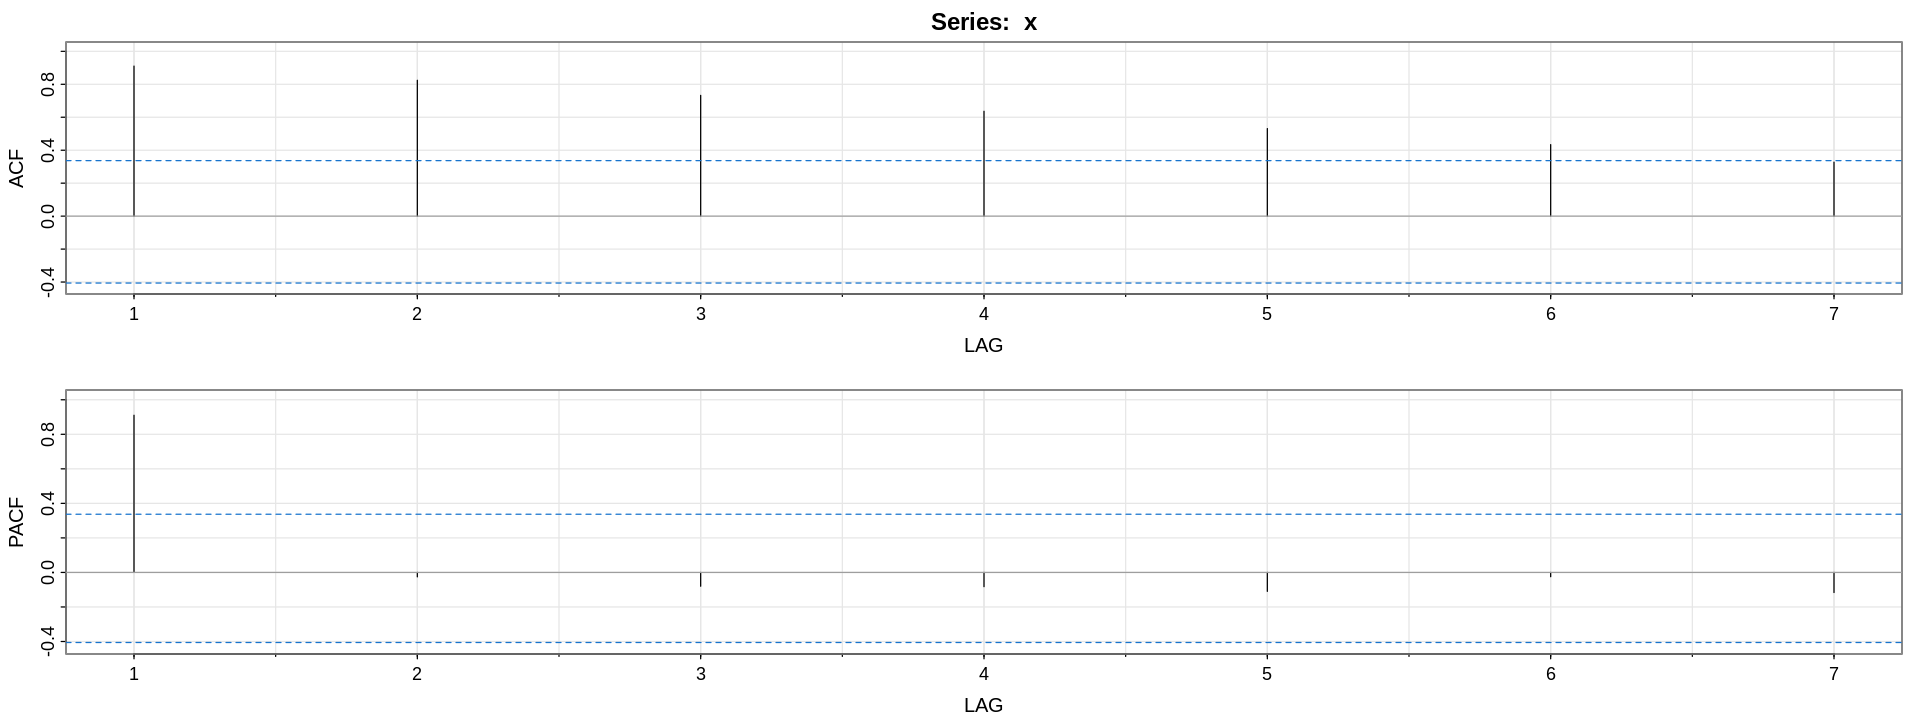

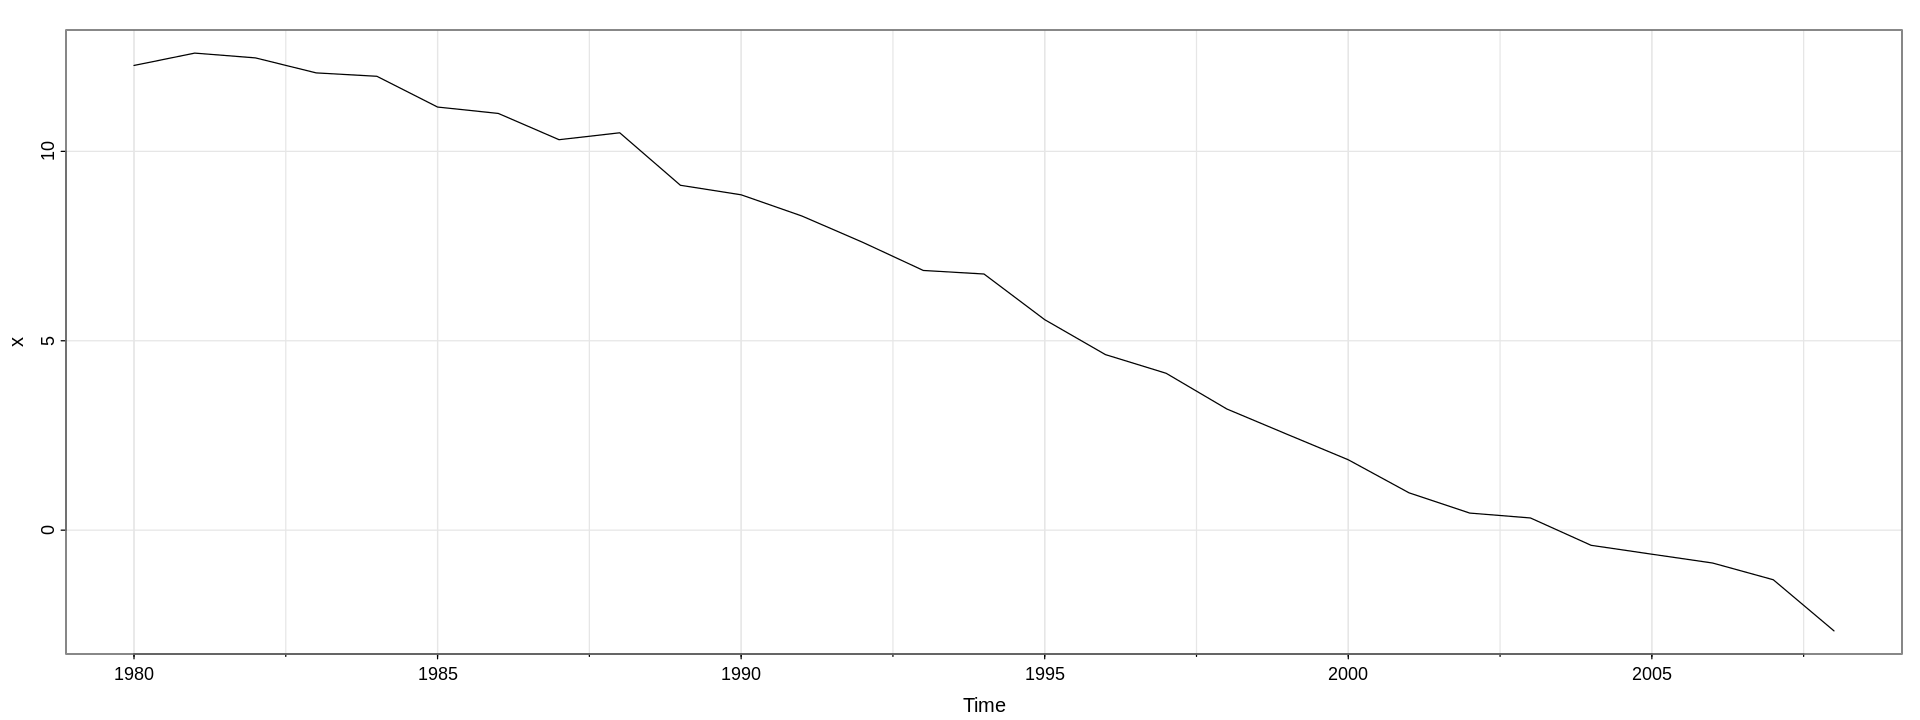

In [9]:
x = log(cpg)
acf2(x)
adf.test(x)
tsplot(x)

Para confirmar lo que vemos en el grafico de que la serie no es estacionaria después de hacer la transformada logaritmica, grafico la ACF y veo que la serie es no estacionaria por ese decaimiento lento en los lags, y confirmo esto con el test de Dickey-Fuller con el que no puedo rechazar la hipotesis alternativa de que la serie es estacionaria ya que el p-value es mayor a 0.05.

Al graficar el logaritmo de la funcion también vemos que la serie sea exponencial debido a que al aplicarle logaritmo se torne en casi una recta, salvo en su primera muestra donde su comportamiento no se corresponde con el resto de la serie.

#### Parte 2
Ajuste lineal a log(cpg)


Call:
lm(formula = x ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77156 -0.39840  0.04726  0.42186  1.13129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1172.49431   27.57793   42.52   <2e-16 ***
t             -0.58508    0.01383  -42.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6231 on 27 degrees of freedom
Multiple R-squared:  0.9851,	Adjusted R-squared:  0.9846 
F-statistic:  1790 on 1 and 27 DF,  p-value: < 2.2e-16


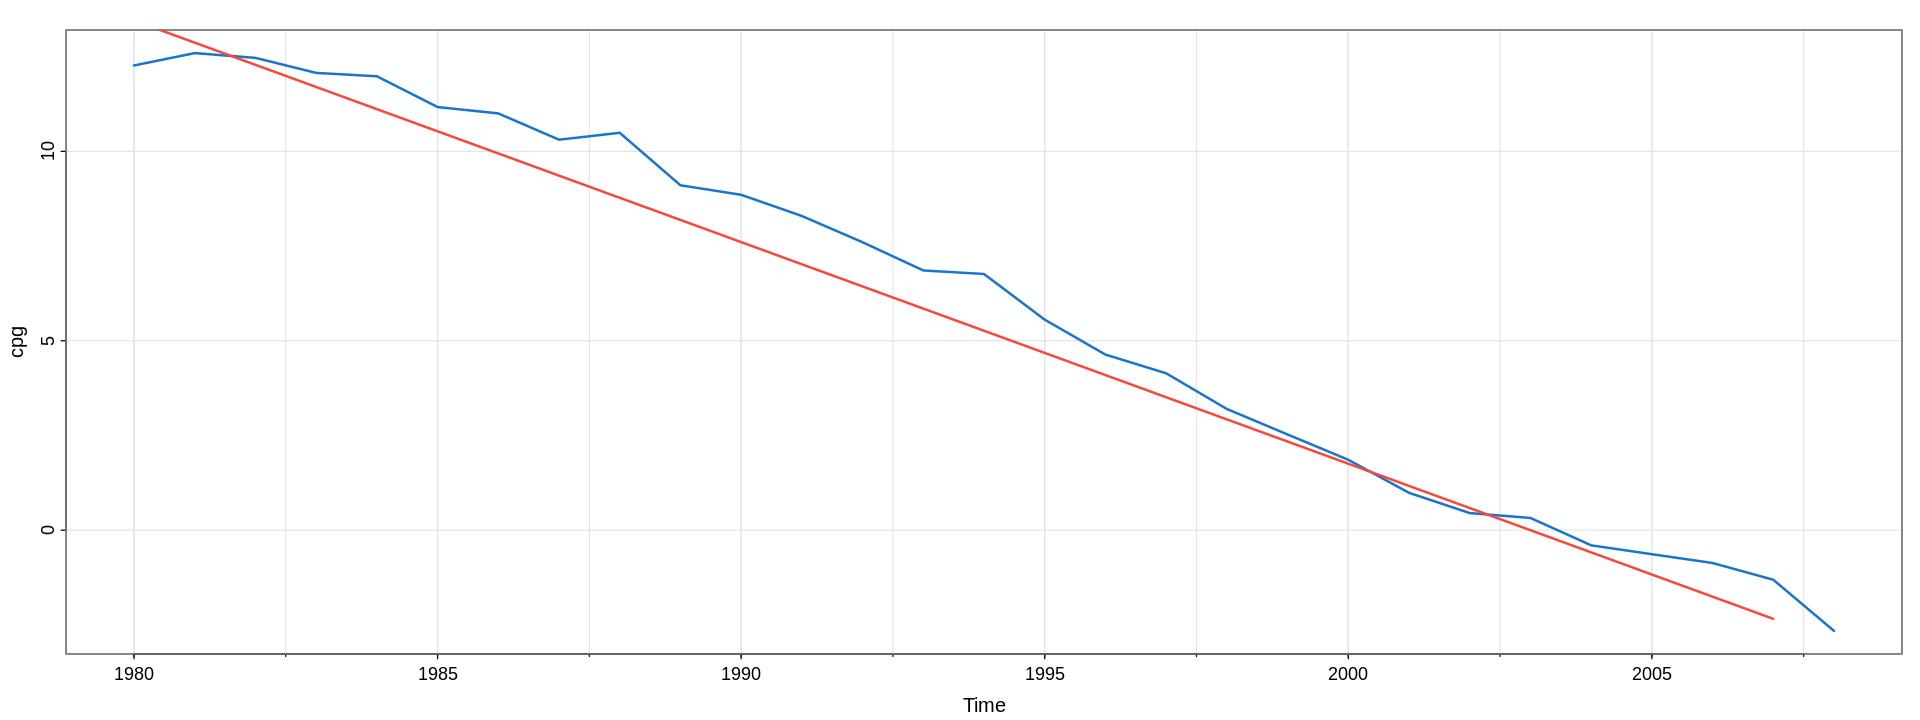

In [29]:
fit_lineal <- lm(x ~ t)

tsplot(x,ylab="cpg",col=4,lwd=2)
predictions = ts(fitted(fit_lineal), start=c(1980,0), frequency = 1)
lines(predictions, col=2, lwd=2)
summary(fit_lineal)

Con un p-value muy cercano a 0 y un R-squared de un 98.51% (que nos dice cuanta varianza el modelo explica sobre los datos) podemos ver que el ajuste lineal sobre el logaritmo resulta en un buen ajuste para la serie temporal log(cpg).  

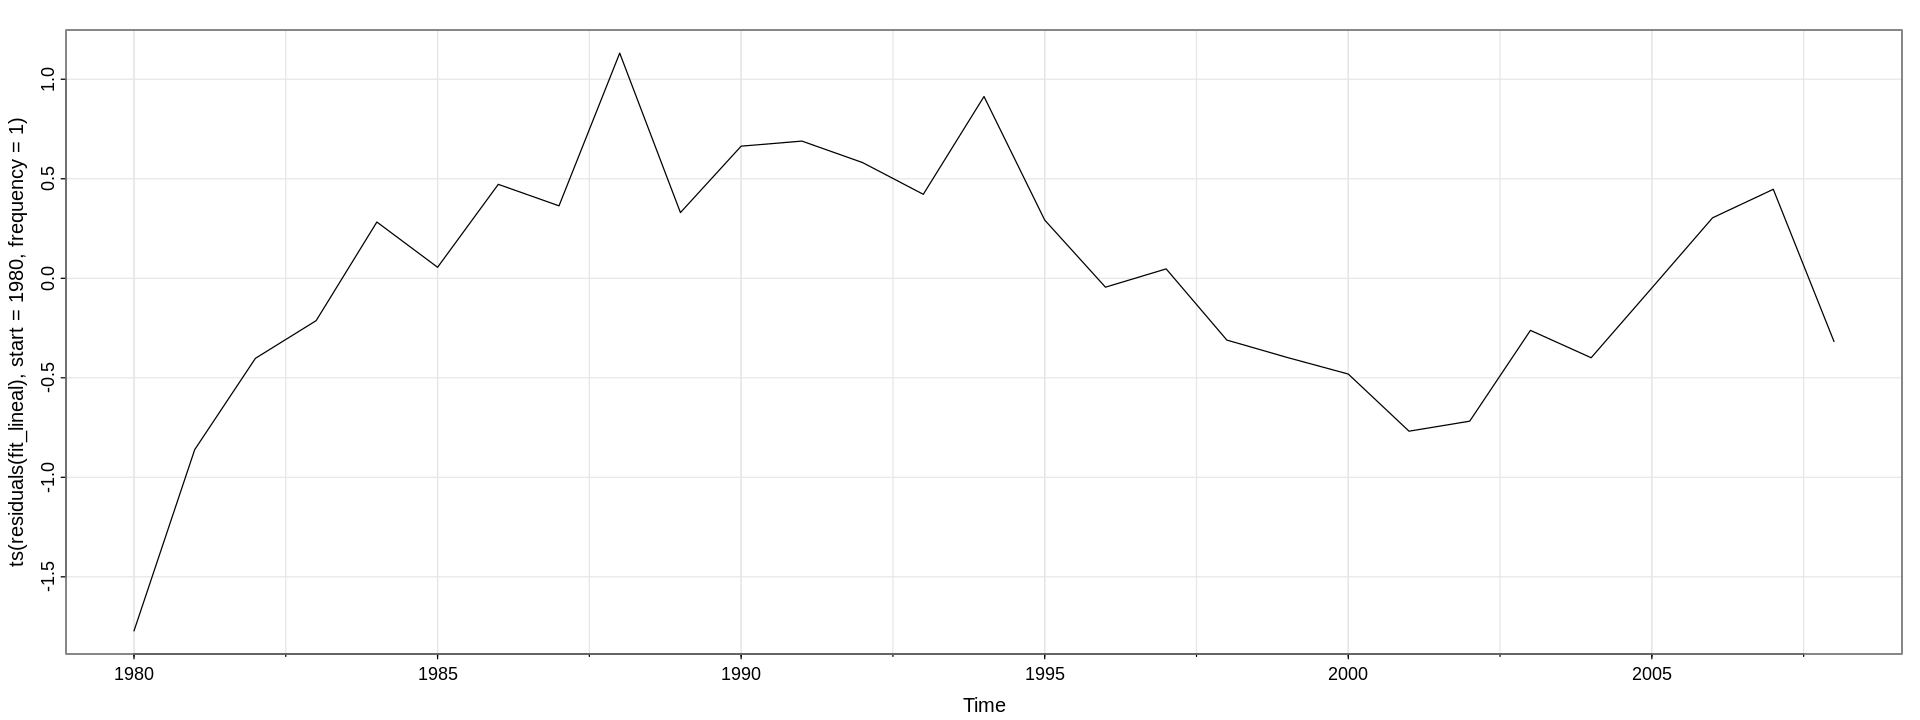

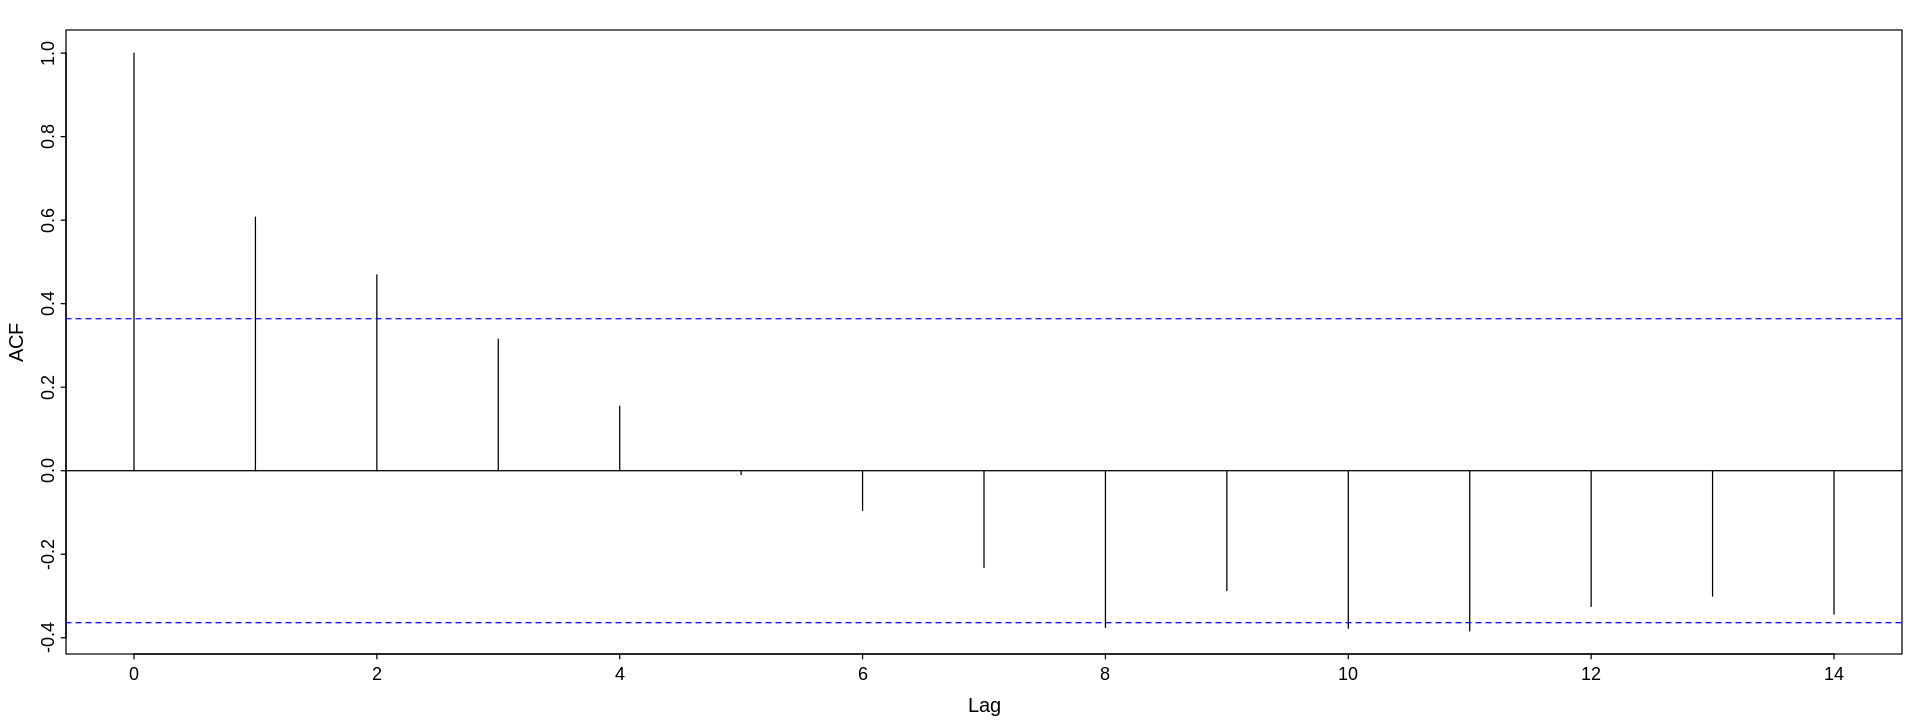

In [25]:
tsplot(ts(residuals(fit_lineal),start=1980,frequency=1))
acf(residuals(fit_lineal))

In [27]:
AIC(fit_lineal)
BIC(fit_lineal)

[1] 58.79239

[1] 62.89428

Analizando la acf de los residuos y los valores de AIC y BIC vemos que se logar un buen ajuste sobre los datos pero que no termina de explicar el modelo a la serie debido a que hay componentes mas allá del retardo 0 en la acf de los residuos que son significativos (mayores a la línea punteada azul).

#### Parte 5

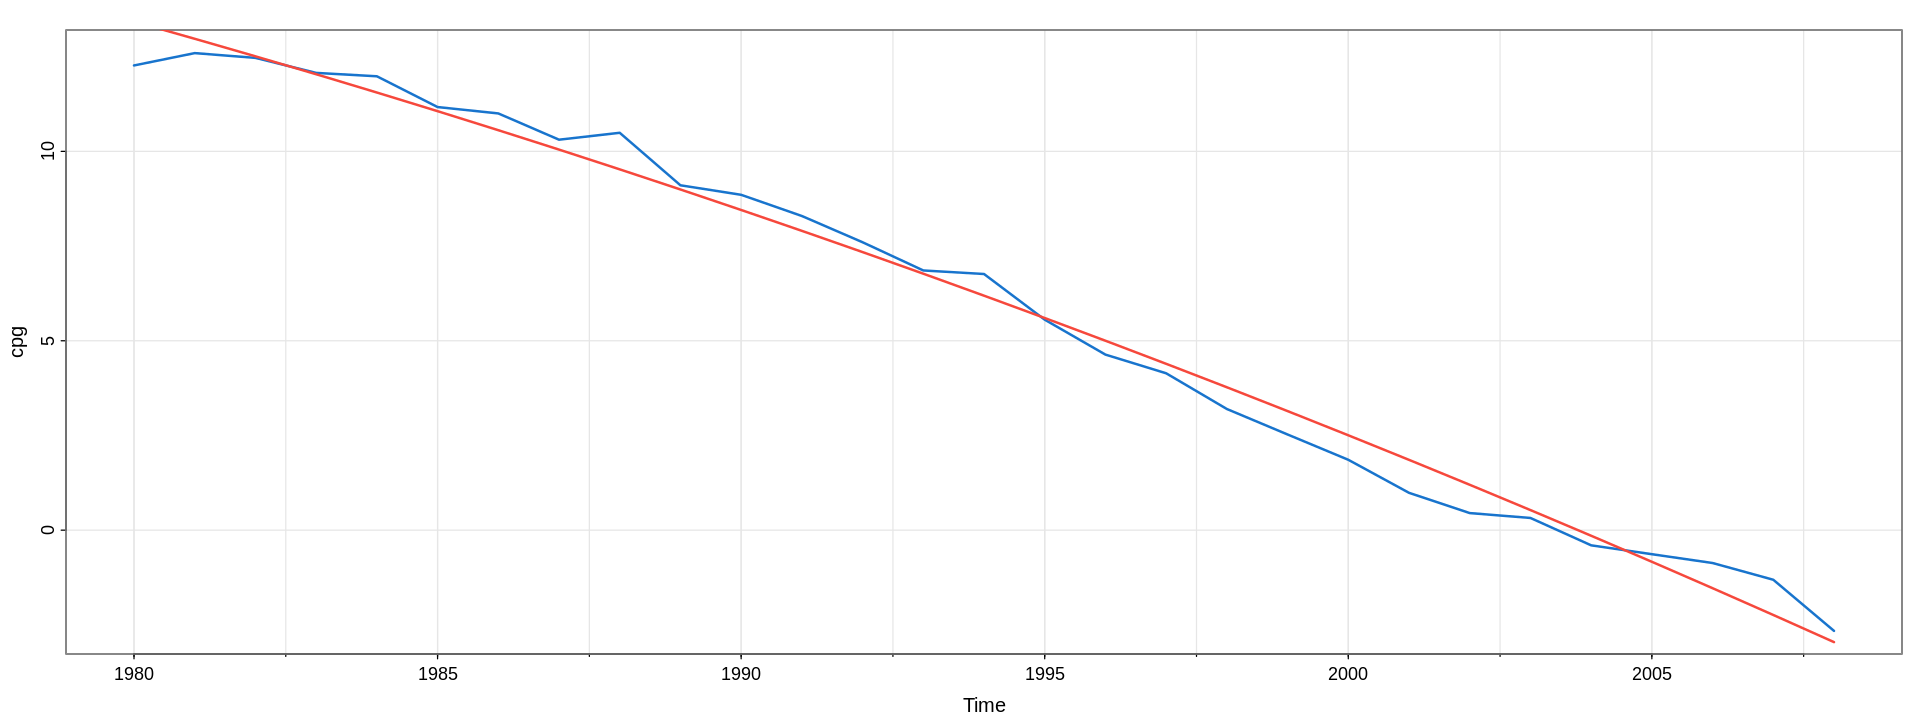


Call:
lm(formula = x ~ t + t2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15727 -0.36641  0.08546  0.39190  0.96553 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.821e+04  6.467e+03  -2.816  0.00915 **
t            1.886e+01  6.487e+00   2.907  0.00736 **
t2          -4.875e-03  1.627e-03  -2.997  0.00592 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5474 on 26 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.9881 
F-statistic:  1164 on 2 and 26 DF,  p-value: < 2.2e-16


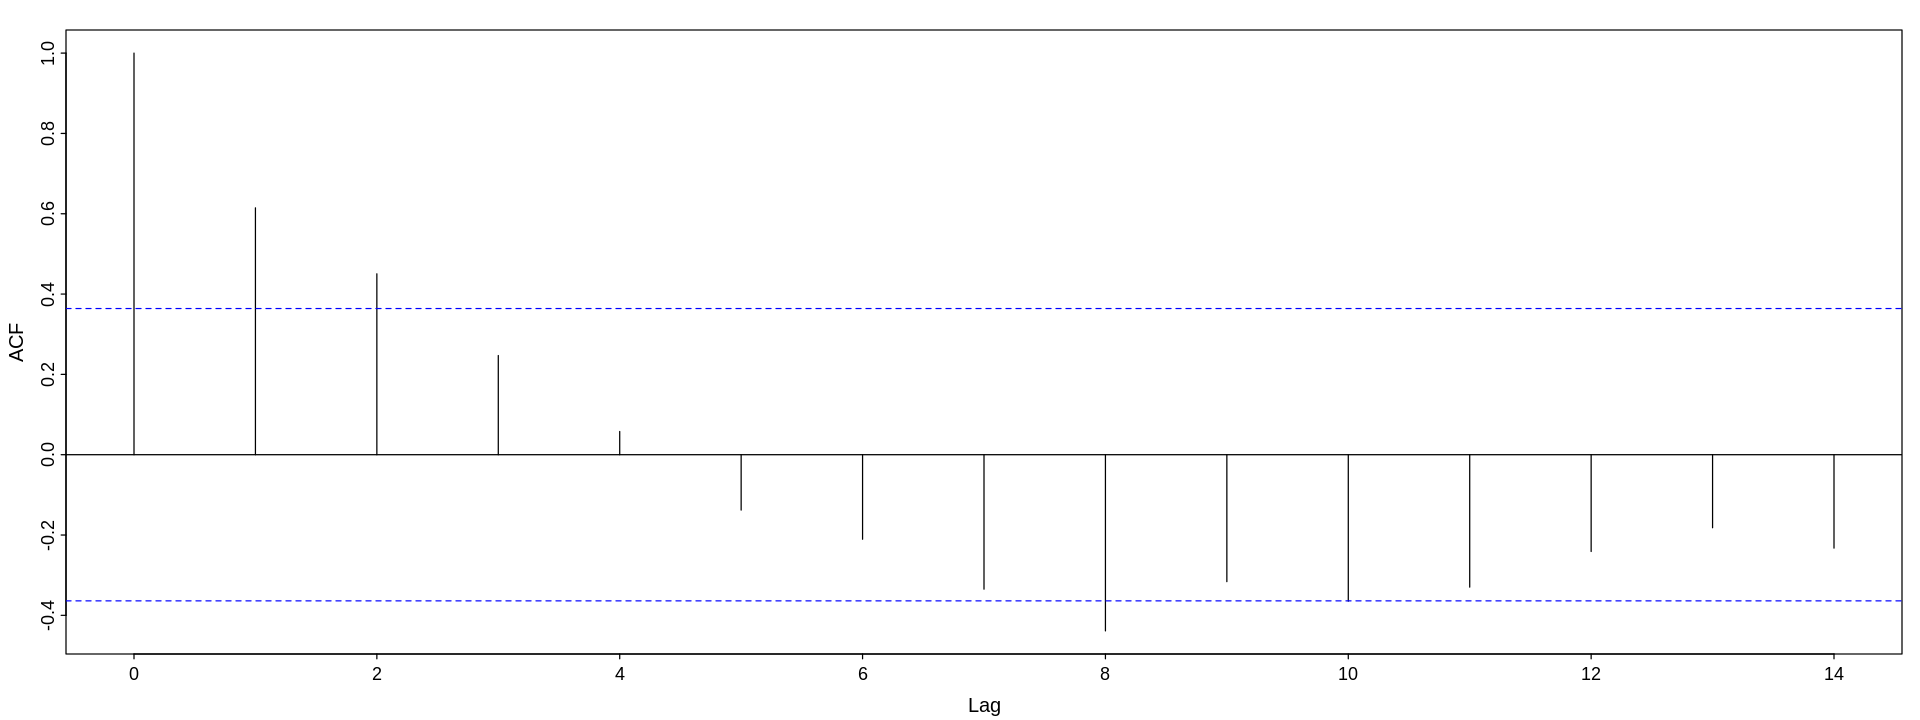

In [18]:
t2 = t^2

fit_cuadratico <- lm(x ~ t + t2)

tsplot(x,ylab="cpg",col=4,lwd=2)
predictions <- ts(fitted(fit_cuadratico),start=1980,frequency=1)
lines(predictions,col=2,lwd=2)
acf(residuals(fit_cuadratico))
summary(fit_cuadratico)

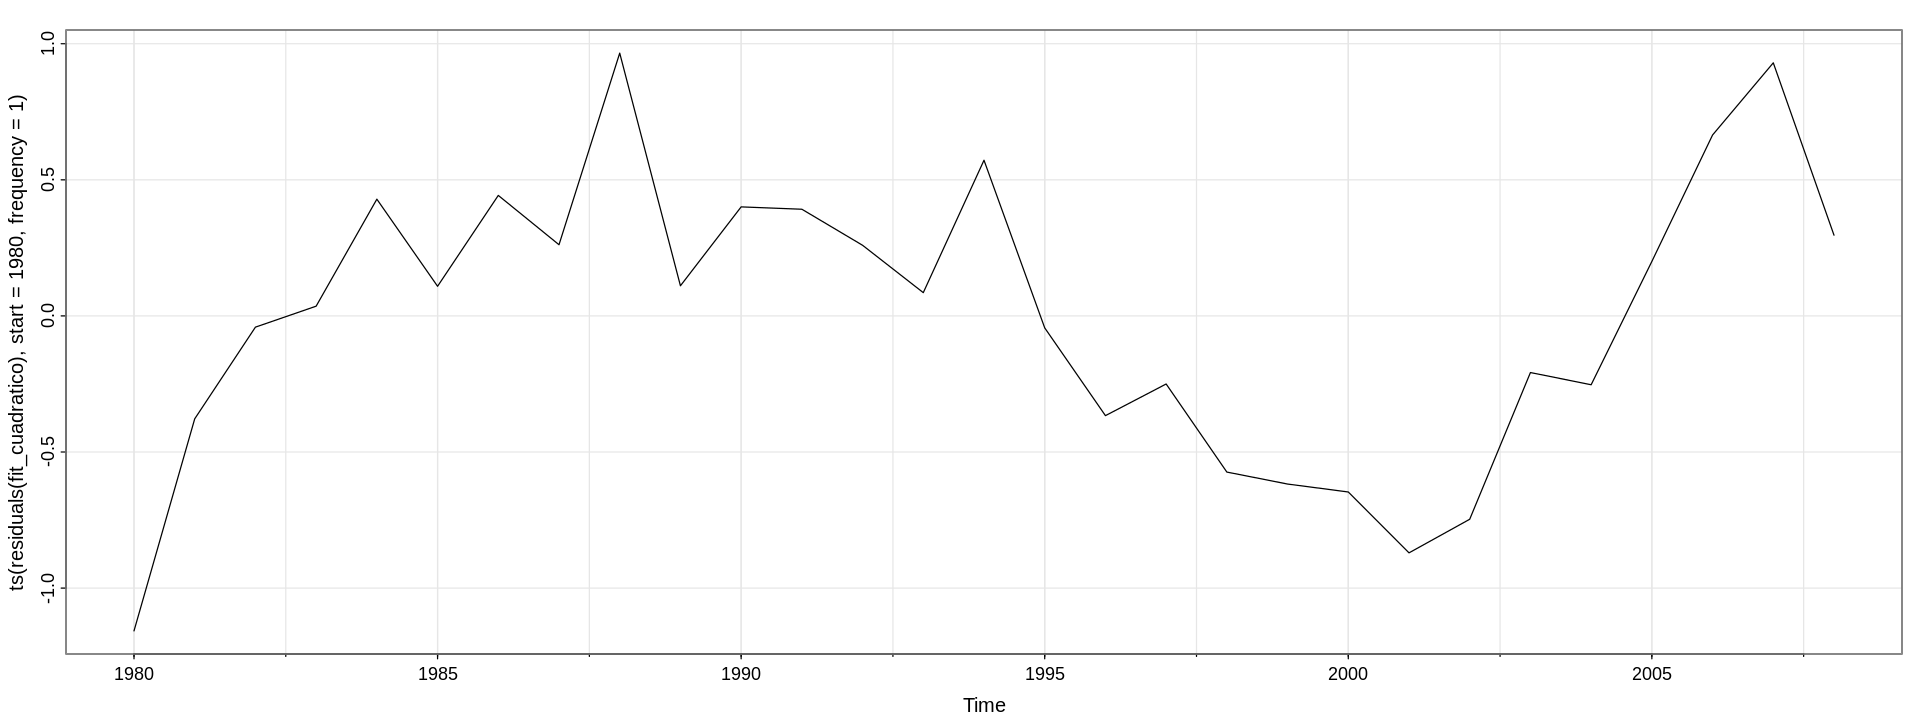

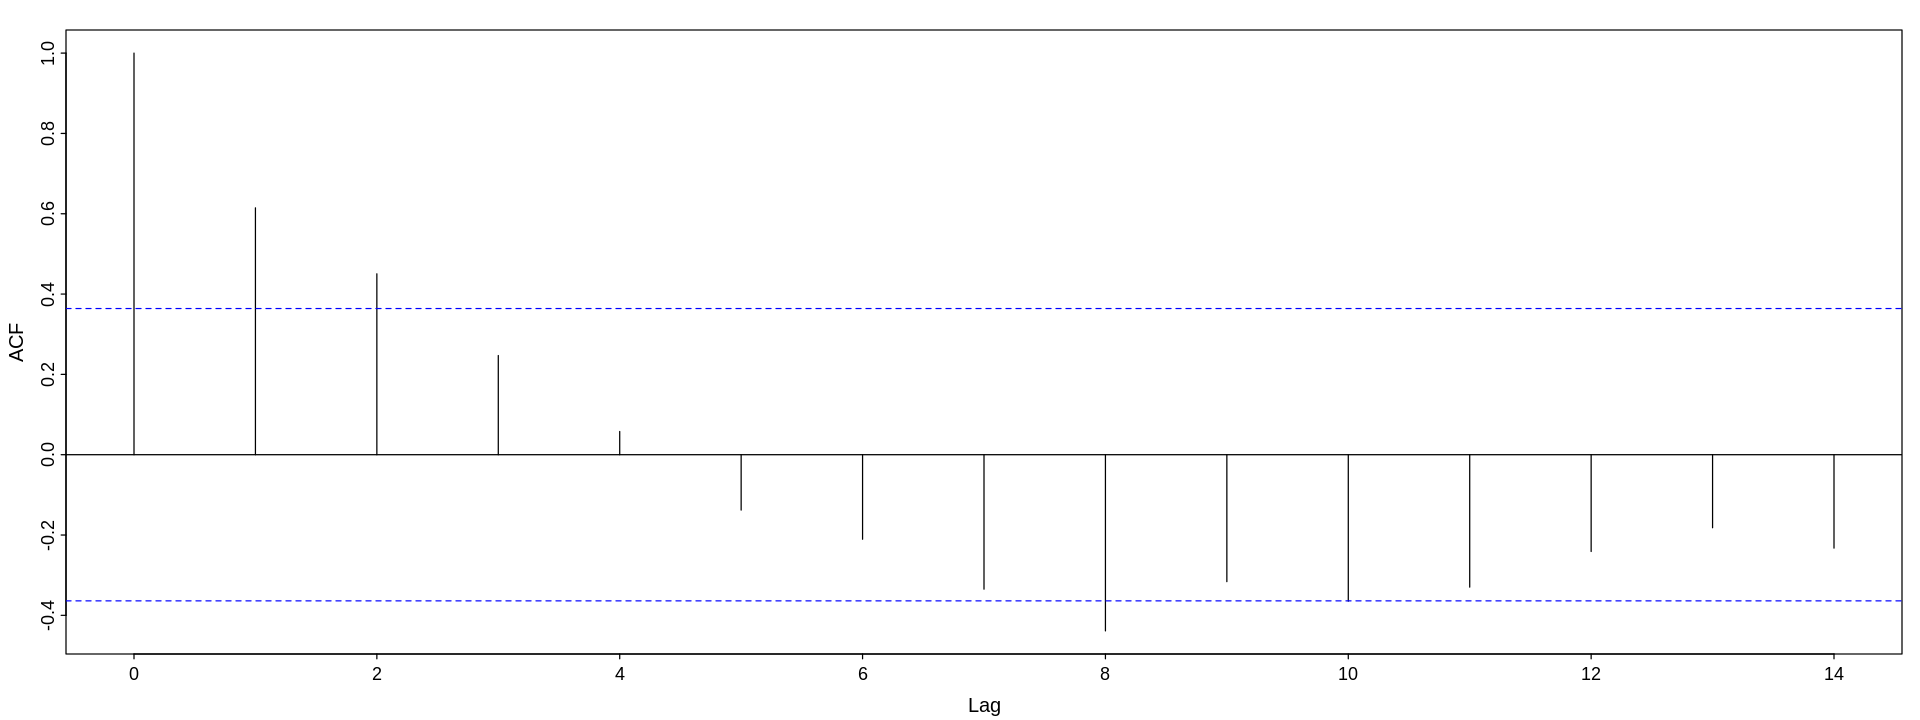

In [26]:
tsplot(ts(residuals(fit_cuadratico),start=1980,frequency=1))
acf(residuals(fit_cuadratico))

In [28]:
AIC(fit_cuadratico)
BIC(fit_cuadratico)

[1] 52.18499

[1] 57.65418

Compartivamente el ajuste cuadratico sobre log(cgp) es un mejor ajuste que el lineal, debido a que el p-value sigue siendo muy bajo al igual que los Pr(>|t|) para cada una de las entradas al modelo individualmente. Además la varianza explicada mostrada con la métrica R-squared aumento de un 98.51 con el ajuste lineal a un 98.9 con el ajuste cuadratico. Otro indicio de la mejoría con el modelo cuadrático es la disminución de los valores de AIC y BIC cuando se utiliza el modelo de ajuste cuadrático.

Comparando graficamente además los residuos se observa que tiene una varianza menor aunque ambos modelos no terminan de capturar toda la información disponible ya que en ambos casos tienen retardos en su acf de los residuos con valores significativos.

## Ejercicio 2

Se considera en primer lugar la serie `sales` de ventas de Oro en sudáfrica en el período Jul 1957 - Dic 1969. Se desea ajustar a dicha serie un modelo ARIMA adecuado.

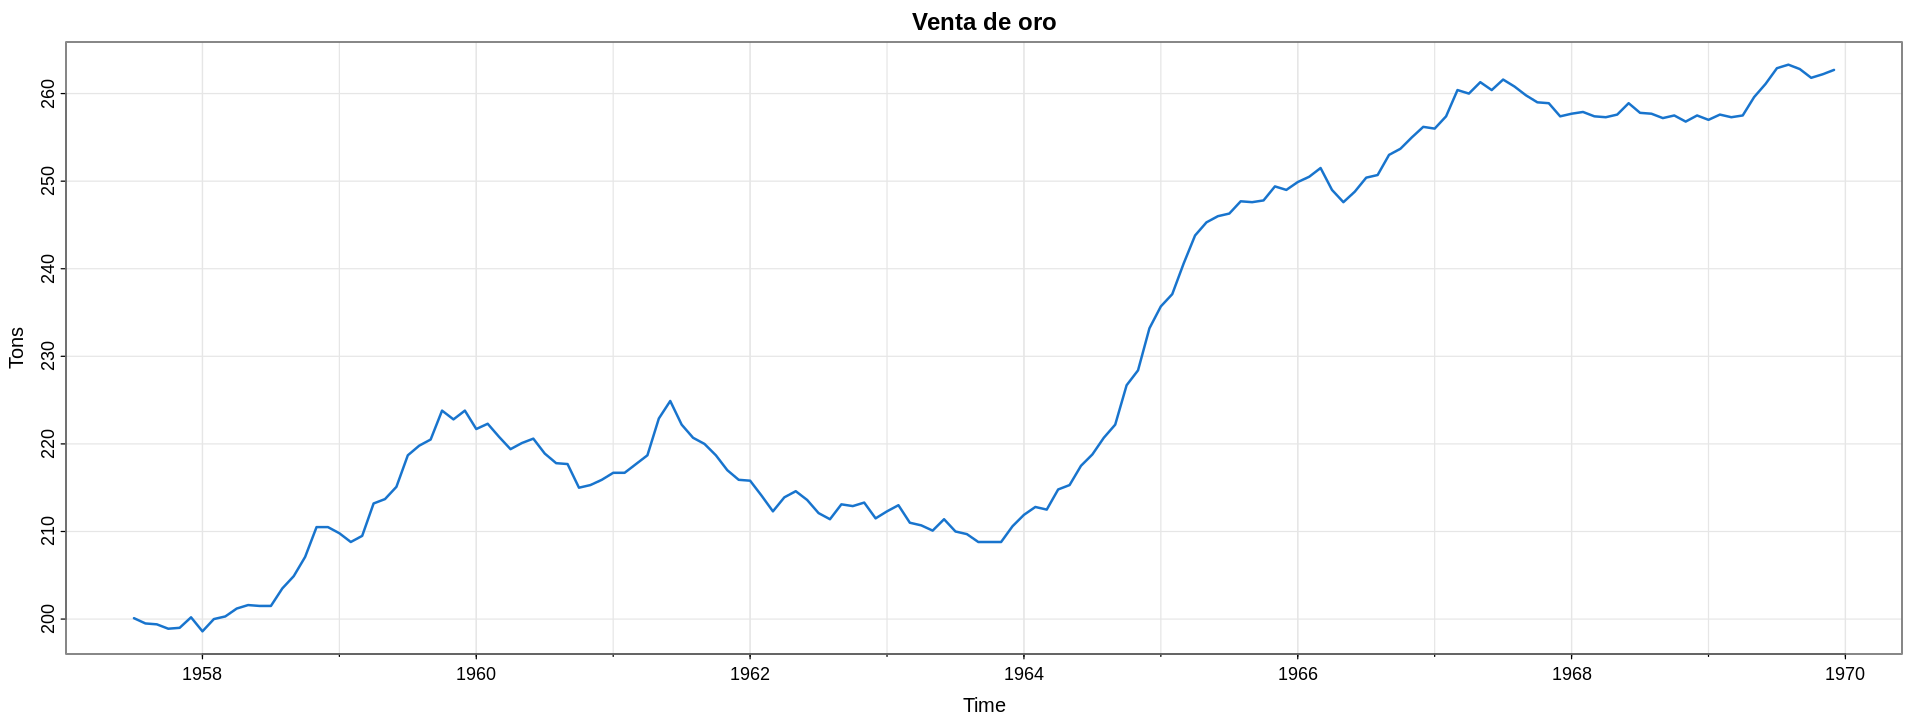

In [30]:
y = ts(sales, start=1957.5, freq=12)
tsplot(y, lwd=2, col=4, main="Venta de oro", ylab="Tons")

Se pide:

   1. Analizar la serie anterior: ¿es estacionaria? ¿Presenta alguna tendencia clara?
   2. Analice la serie de incrementos de $y_t$. ¿Puede decir que es estacionaria? ¿Cuál es el incremento medio?
   3. Realice un análisis de autocorrelación de la serie diferenciada y elija dos modelos de tipo ARMA adecuados           para la misma.
   4. Ajuste los modelos anteriores a la serie original `sales` (no olvide incluir el orden de integración $I$). Compare los resultados obtenidos analizando los residuos y la calidad del ajuste.
   5. Elija el modelo que le parezca más adecuado y realice una predicción para el año 1970 incluyendo intervalos de confianza.
   

#### Parte 1

De forma visible vemos que la serie no es estacionaria ya que presenta una tendencia creciente, para verificar esto grafico la acf y me apoyo con el test de dickey fuller de estacionaridad.

ACF,0.98,0.96,0.94,0.92,0.90,0.87,0.85,0.83,0.80,0.78,⋯,0.14,0.12,0.10,0.09,0.07,0.06,0.05,0.03,0.02,0.01
PACF,0.98,-0.06,-0.05,-0.07,-0.06,-0.01,-0.03,0.01,-0.01,-0.01,⋯,0.01,-0.03,0.03,0.00,0.02,0.00,-0.02,-0.04,0.03,0.02



	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -2.1109, Lag order = 5, p-value = 0.5302
alternative hypothesis: stationary


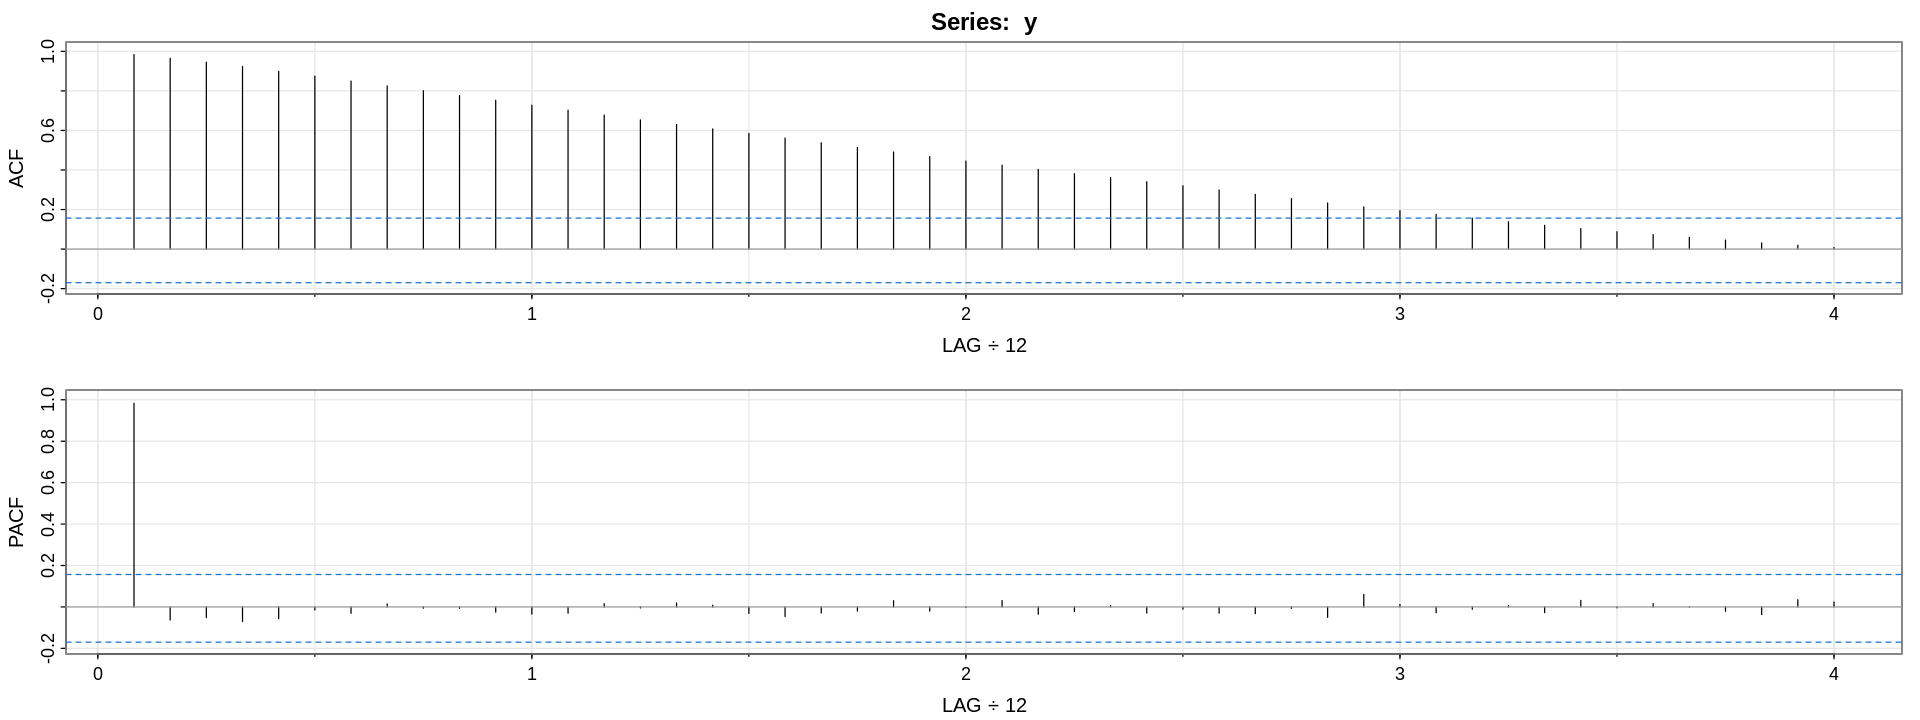

In [32]:
acf2(y)
adf.test(y)

Como p-value es mayor a 0.05 no puedo concluir que sea estacionaria, además de la acf el decaimiento tan lento permite concluir que la serie no es estacionaria.

De forma gráfica podemos ver que presenta una clara tendencia creciente en el largo plazo.

#### Parte 2
Vamos a analizar los incrementos de y, para esto tomaremos la primera diferencia:

[1] 0.4201342

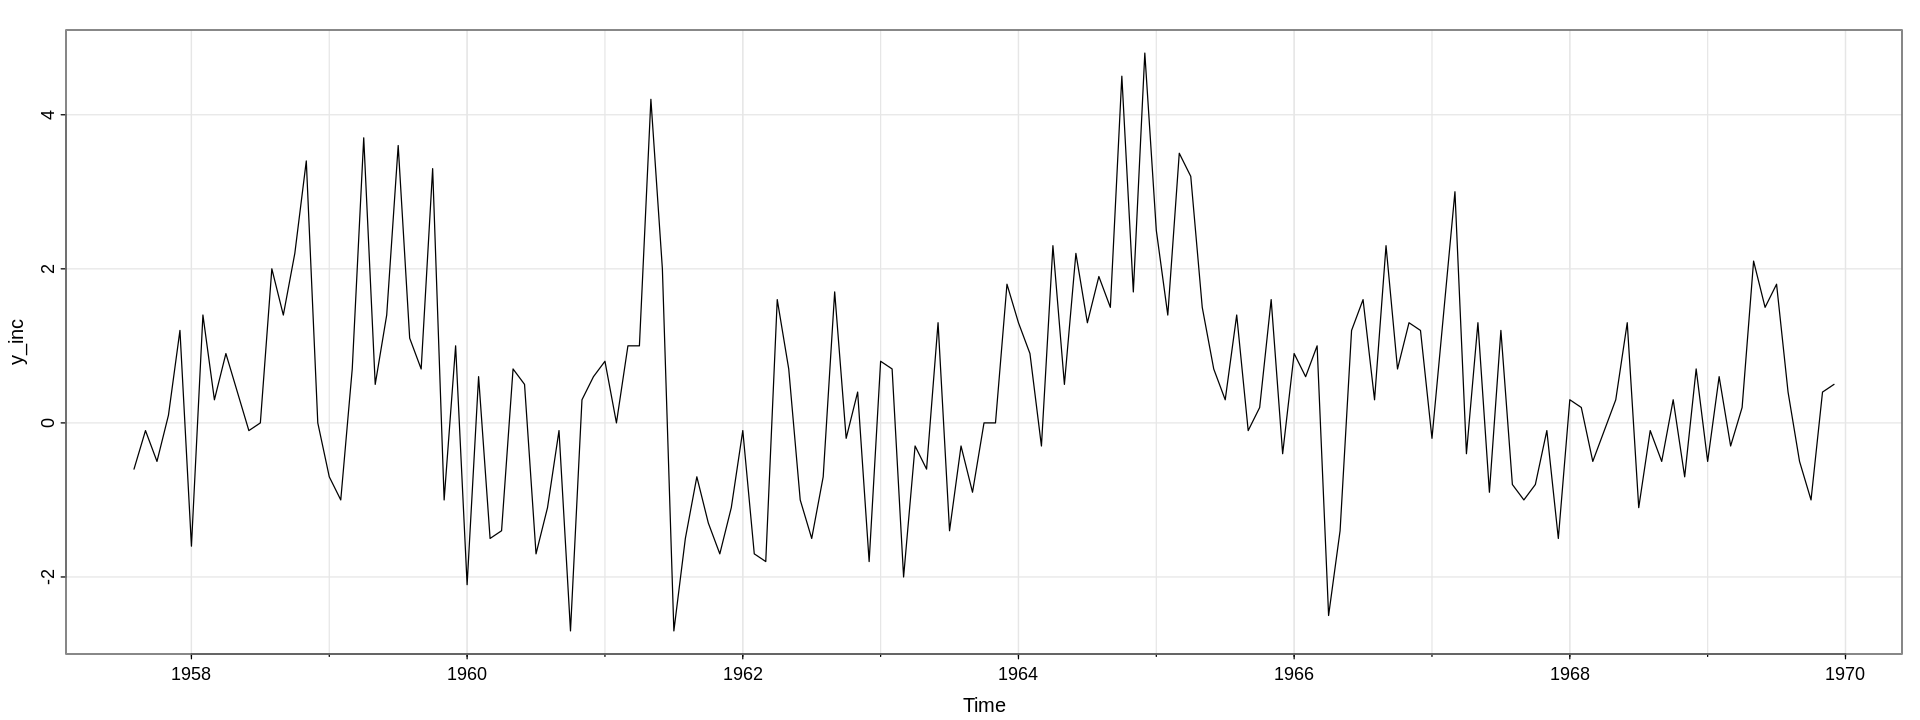

In [40]:
y_inc = diff(y)
tsplot(y_inc)
# Saco el incremento medio
mean(y_inc)

El incremento medio, calculado a partir de hacer mean(diff(y)) es aproximadamente 0.42. La serie parece ser estacionaria pero lo comprobaremos haciendo la acf y el test de Dickey-Fuller nuevamente, pero esta vez sobre los incrementos de y:

ACF,0.31,0.28,0.23,0.25,0.15,0.13,0.06,0.13,-0.02,0.00,⋯,-0.21,-0.16,-0.12,-0.06,-0.10,-0.18,-0.12,-0.02,-0.08,-0.13
PACF,0.31,0.20,0.11,0.14,0.00,0.01,-0.05,0.07,-0.11,-0.03,⋯,-0.11,0.03,0.00,0.06,-0.07,-0.10,0.05,0.01,0.01,-0.14



	Augmented Dickey-Fuller Test

data:  y_inc
Dickey-Fuller = -3.3485, Lag order = 5, p-value = 0.06585
alternative hypothesis: stationary


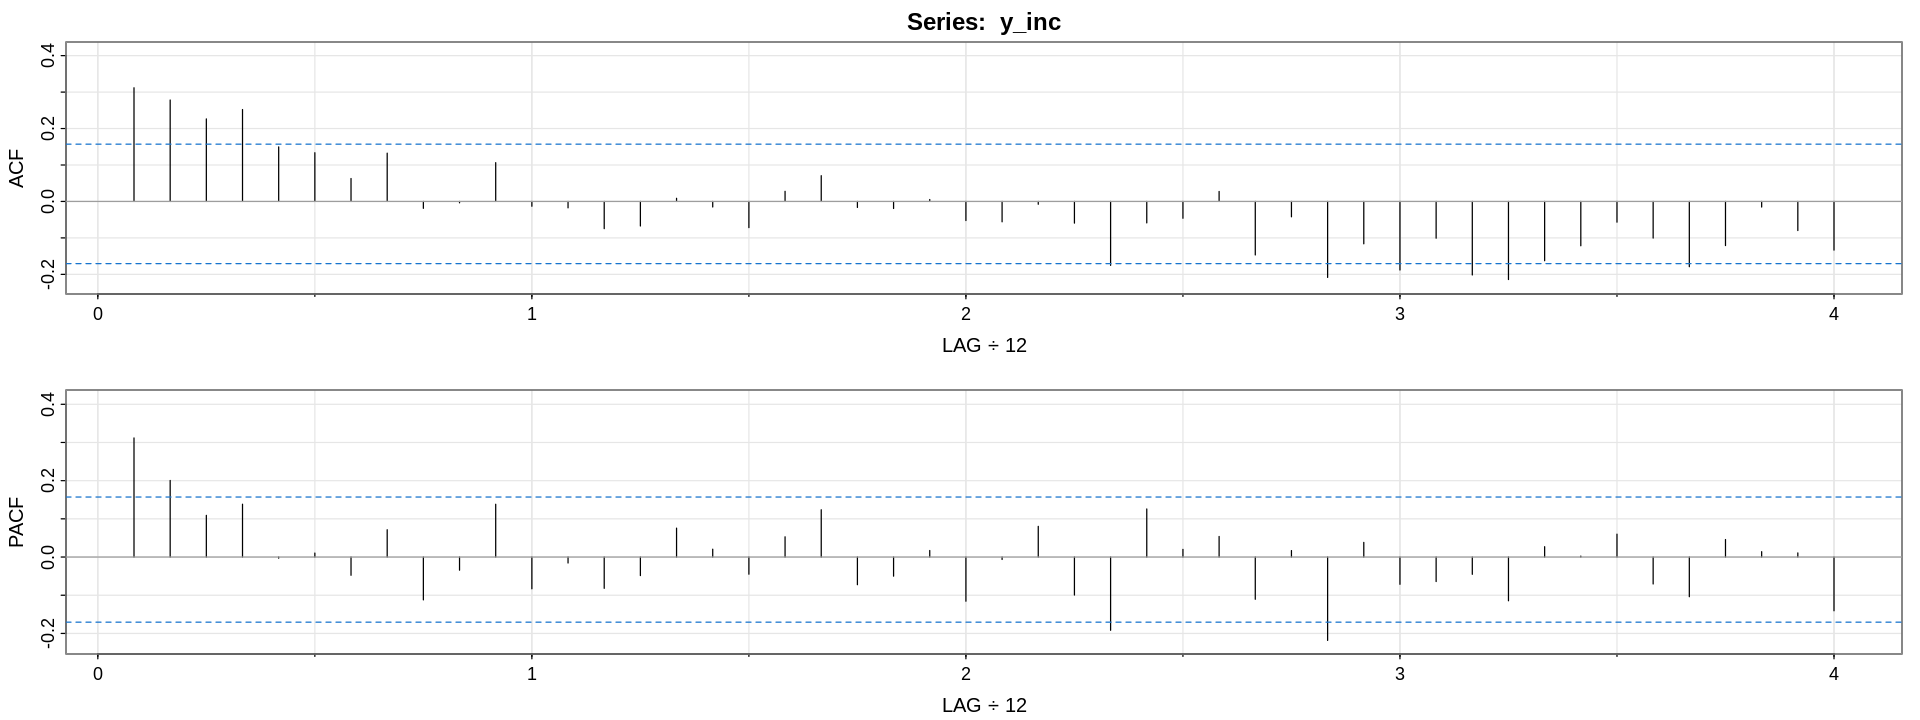

In [41]:
acf2(y_inc)
adf.test(y_inc)

Aunque todavía no es menor a 0.05 el nivel de significancia del test de Dickey-Fuller, la serie de incrementos de y se comporta mucho más cercana a una estacionaria por lo que podríamos dejarlo ahí. Para comprobar voy a tomar la segunda diferencia y analizar si esta se vuelve estacionaria con un nivel de significancia mayor:

ACF,-0.48,0.01,-0.06,0.10,-0.07,0.05,-0.10,0.16,-0.12,-0.07,⋯,-0.04,0.01,-0.02,0.08,0.03,-0.1,-0.03,0.12,-0.02,-0.09
PACF,-0.48,-0.28,-0.25,-0.08,-0.10,-0.03,-0.14,0.05,-0.04,-0.20,⋯,-0.10,-0.06,-0.12,0.02,0.05,-0.1,-0.05,-0.05,0.08,-0.05


Warning message in adf.test(y_inc2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  y_inc2
Dickey-Fuller = -6.562, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


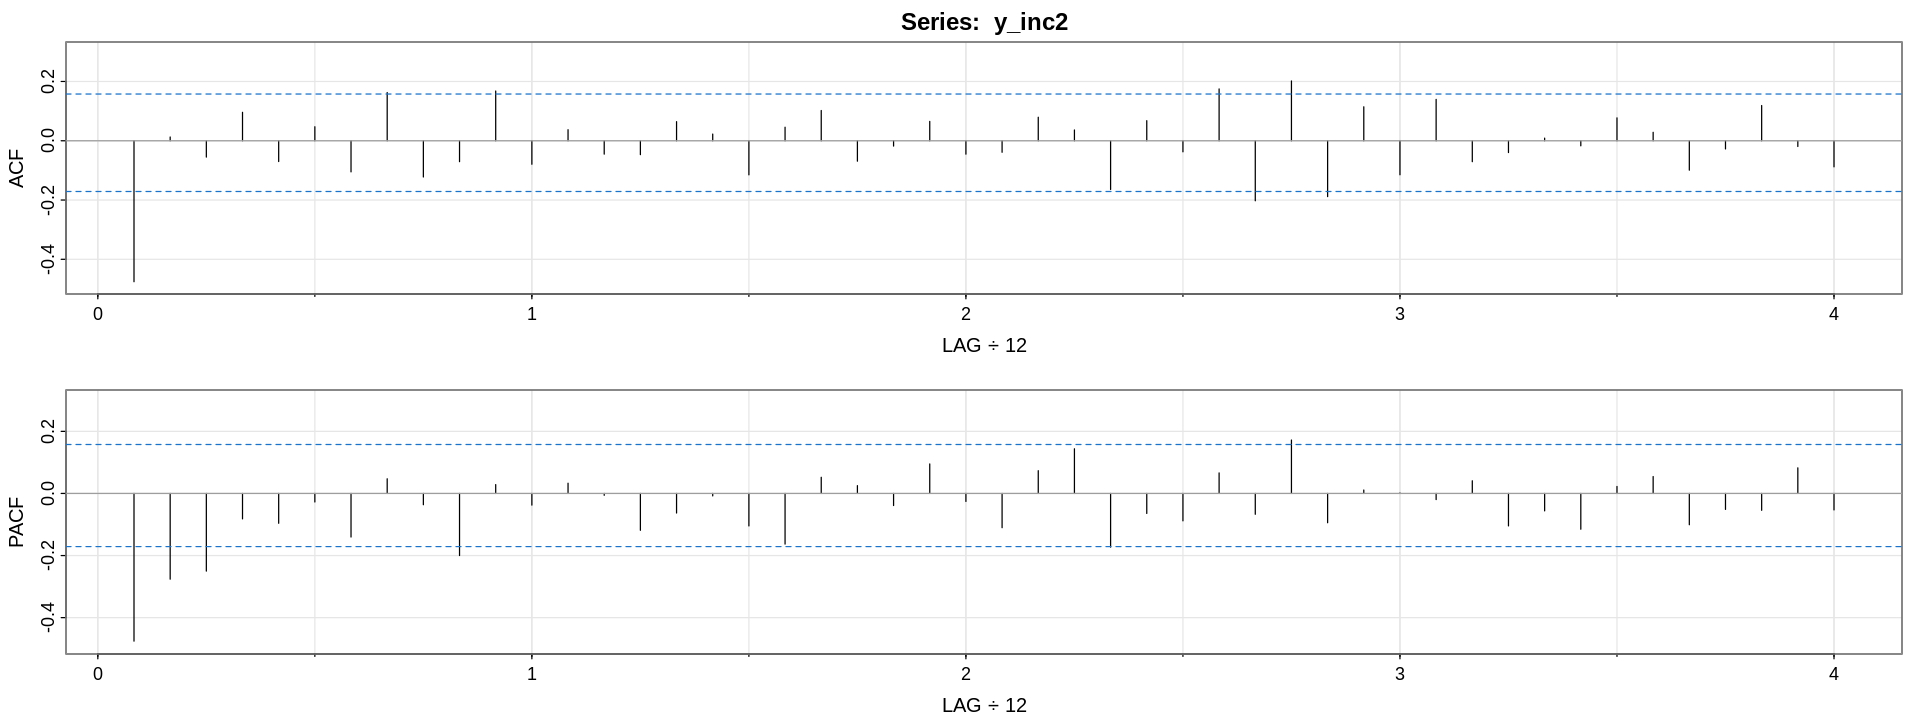

In [42]:
y_inc2 = diff(y_inc) # y_inc = diff(y)
acf2(y_inc2)
adf.test(y_inc2)

Efectivamente, considerando la segunda diferencia sobre la serie es con un 99% de confianza estacionaria según el test de dickey fuller. Esto también lo podemos ver con la acf que luego del primer retardo cae su autocorrelación a niveles despreciables.  

#### Parte 3
##### Ajuste de modelos ARIMA
De la PACF de y_inc podemos ver que la serie y_inc tiene un retardo con autocorrelación significativa, por lo que podríamos probar un componente autorregresivo de orden 1 o 2 mientras que de la acf que hay un componente de media móvil, MA posible de orden 1 o 2 también. Hago la prueba y comparo:  

In [46]:
t = time(y)-1957.5

In [53]:
p = 1
d = 1 # Primer diferencia
q = 1
fit1 <- arima(y, order=c(p,d,q)) # Cambia p1 y q1 a los valores que elijas
AIC(fit1)
BIC(fit1)
summary(fit1)

[1] 514.736

[1] 523.7479


Call:
arima(x = y, order = c(p, d, q))

Coefficients:
         ar1      ma1
      0.8800  -0.6415
s.e.  0.0644   0.1035

sigma^2 estimated as 1.775:  log likelihood = -254.37,  aic = 514.74

Training set error measures:
                    ME     RMSE    MAE        MPE      MAPE      MASE
Training set 0.1457572 1.328119 1.0447 0.06512899 0.4600935 0.8997702
                    ACF1
Training set -0.02622396

In [52]:
p = 2
d = 1 # Primer diferencia
q = 1
fit2 <- arima(y, order=c(p,d,q)) # Cambia p1 y q1 a los valores que elijas
AIC(fit2)
BIC(fit2)
summary(fit2)

[1] 516.6444

[1] 528.6602


Call:
arima(x = y, order = c(p, d, q))

Coefficients:
         ar1     ar2     ma1
      0.8305  0.0360  -0.607
s.e.  0.1774  0.1178   0.160

sigma^2 estimated as 1.774:  log likelihood = -254.32,  aic = 516.64

Training set error measures:
                    ME     RMSE     MAE        MPE      MAPE      MASE
Training set 0.1475497 1.327693 1.04388 0.06584405 0.4597637 0.8990644
                    ACF1
Training set -0.01188085

In [55]:
p = 2
d = 1 # Primer diferencia
q = 2
fit3 <- arima(y, order=c(p,d,q)) # Cambia p1 y q1 a los valores que elijas
AIC(fit3)
BIC(fit3)
summary(fit3)

[1] 518.1549

[1] 533.1747


Call:
arima(x = y, order = c(p, d, q))

Coefficients:
         ar1     ar2     ma1      ma2
      0.0209  0.7442  0.1998  -0.5060
s.e.  0.2078  0.1854  0.2305   0.1744

sigma^2 estimated as 1.768:  log likelihood = -254.08,  aic = 518.15

Training set error measures:
                    ME     RMSE      MAE        MPE      MAPE     MASE
Training set 0.1472829 1.325462 1.042007 0.06572642 0.4591257 0.897451
                     ACF1
Training set -0.004573361

Entre los 3 modelos probados, el que mejor ajuste tiene es el de p=1 y q=1 por lo que ese sería el modelo elegido, en base a los criterios AIC y BIC y la información observada de las graficas acf y pacf. Utilizo auto arima para comprobar y validar lo observado:

In [51]:
model <- auto.arima(y, ic = "aic")
summary(model)

Series: y 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.8800  -0.6415
s.e.  0.0644   0.1035

sigma^2 = 1.8:  log likelihood = -254.37
AIC=514.74   AICc=514.9   BIC=523.75

Training set error measures:
                    ME     RMSE    MAE        MPE      MAPE      MASE
Training set 0.1457572 1.328119 1.0447 0.06512899 0.4600935 0.1337991
                    ACF1
Training set -0.02622396

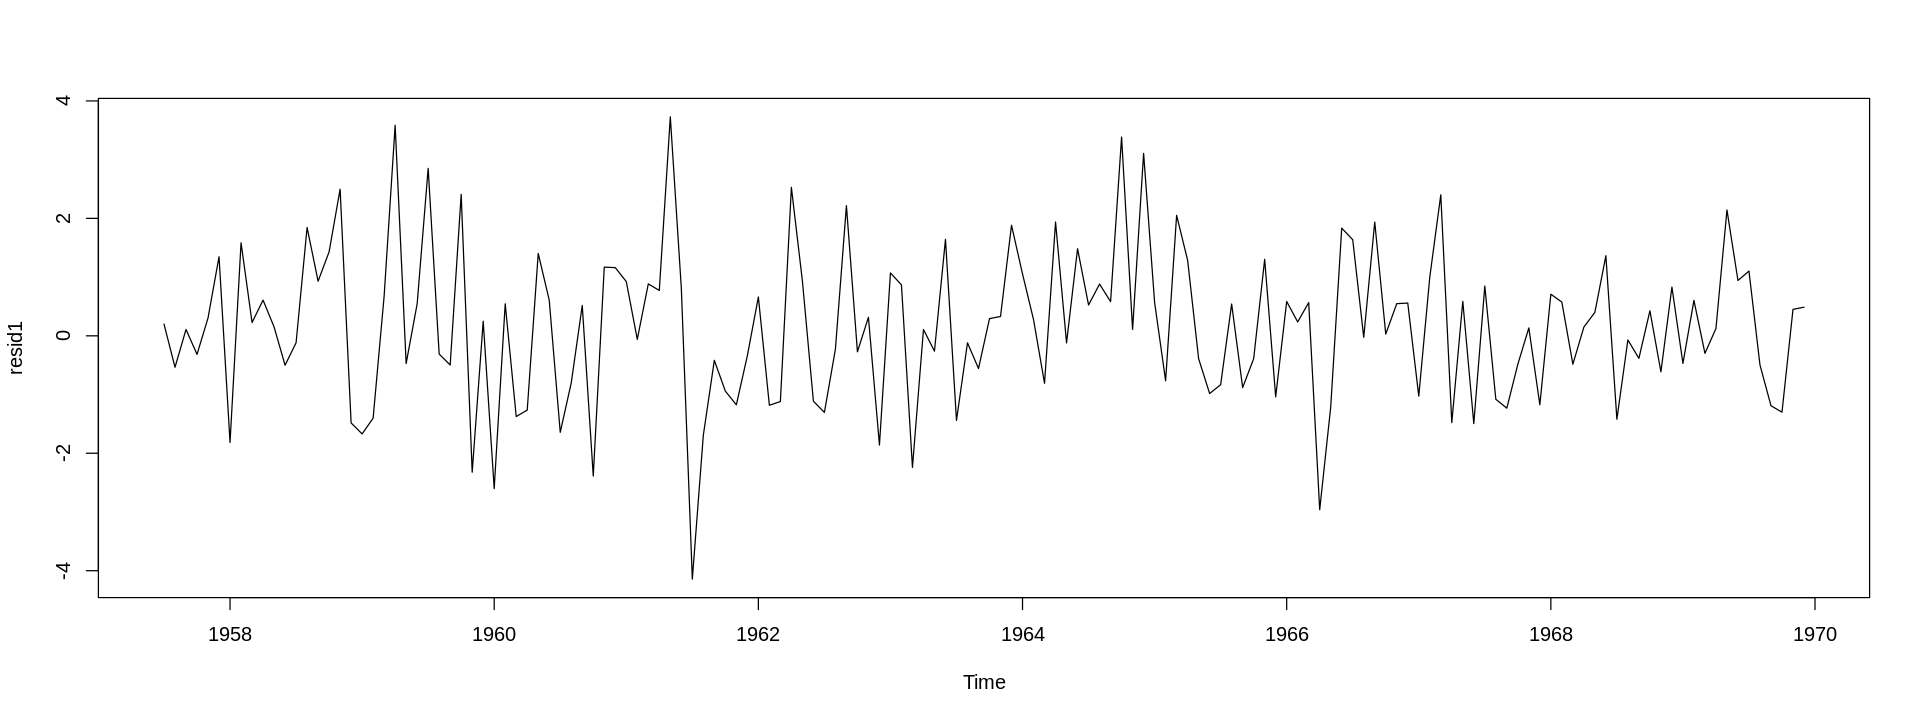

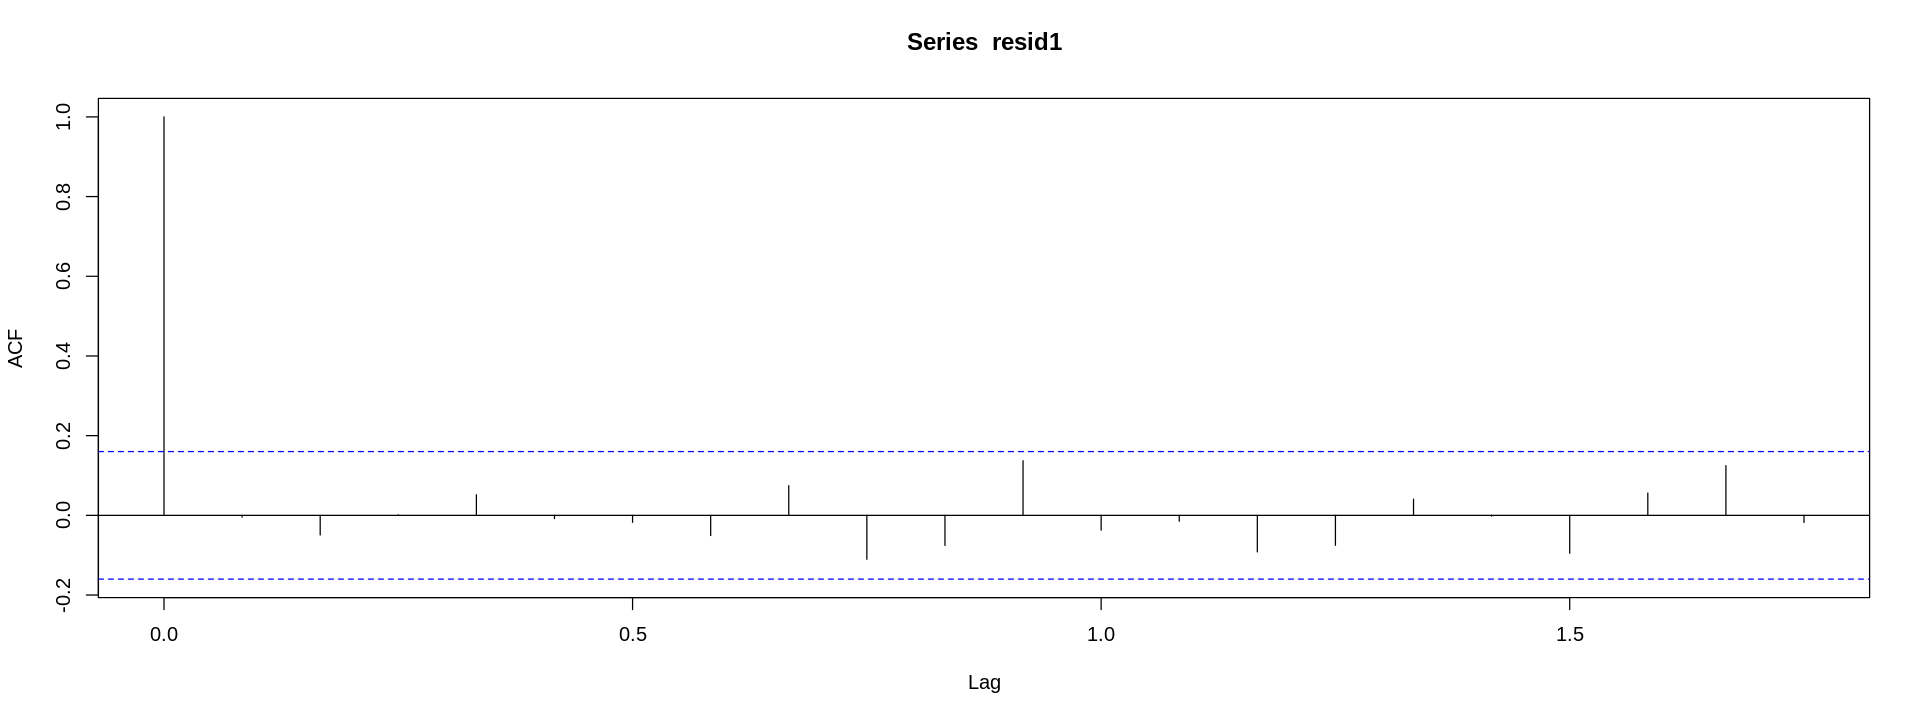

In [59]:
resid1 <- residuals(fit1)
plot(resid1)
acf(resid1)

La serie parece ajustarse bien por el modelo dado que los residuos se comportan como ruido blanco, dado que la acf de los residuos es muy similar a la que tendría una de ruido blanco (1 en el primer valor y el resto de los valores por debajo del nivel de significancia de la línea azúl).

#### Parte 5

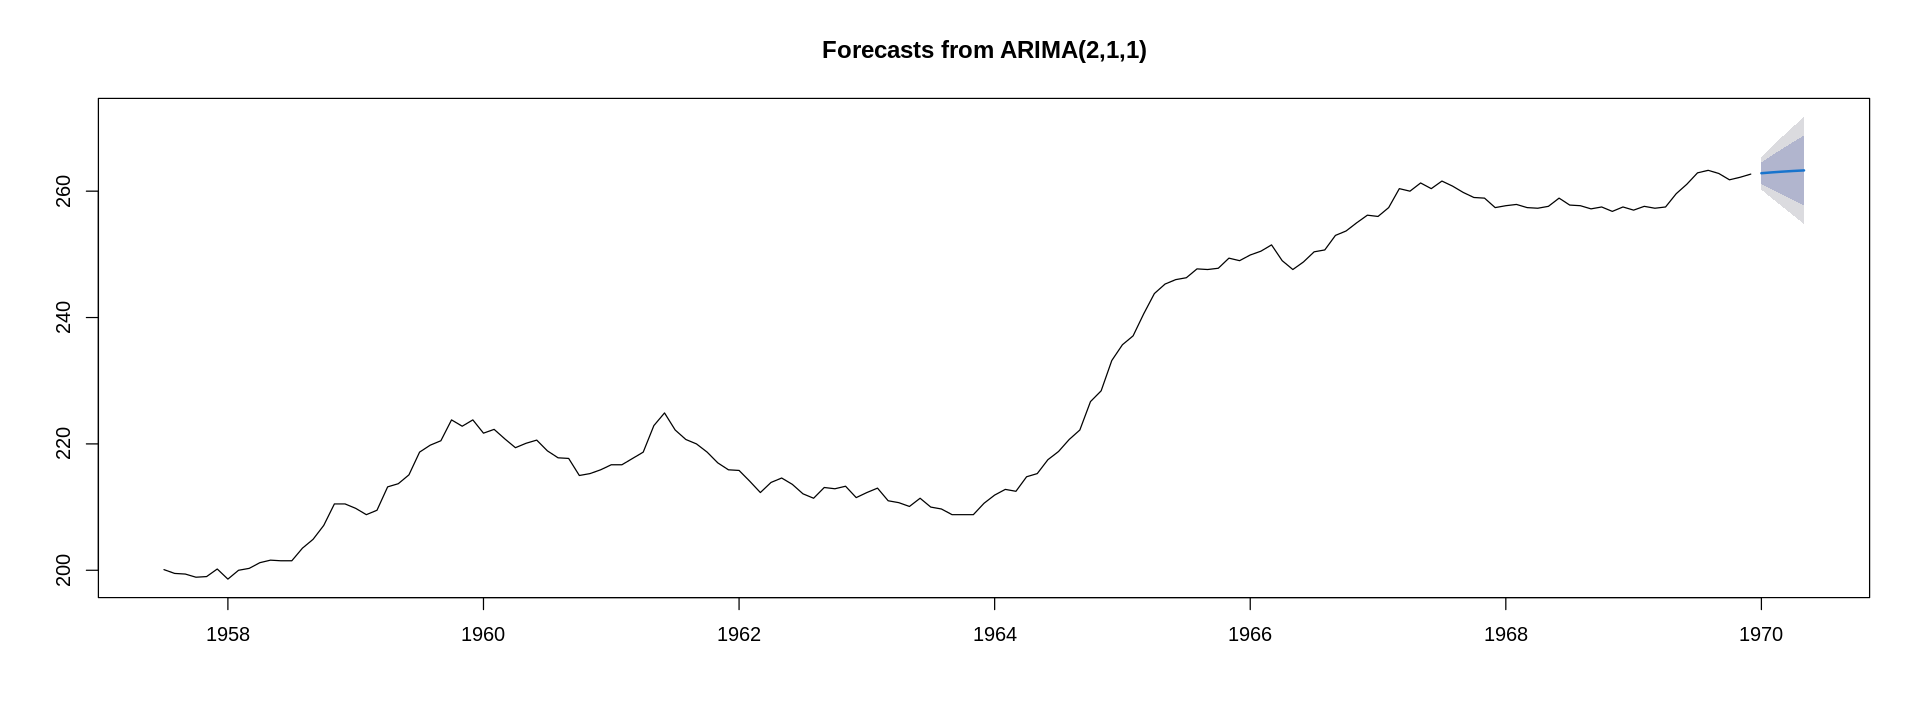

In [63]:
library(forecast)
pred <- forecast(fit2, h=5)
plot(pred)

Tomo una predicción a 5 años de la serie de tiempo para que se visualicen mejor los intervalos de confianza solicitados usando el modelo elegido.

## Ejercicio 3

A la serie anterior de `sales` se le agrega ahora el indicador de precio del oro en el mercado internacional, dado por la serie `lead`.

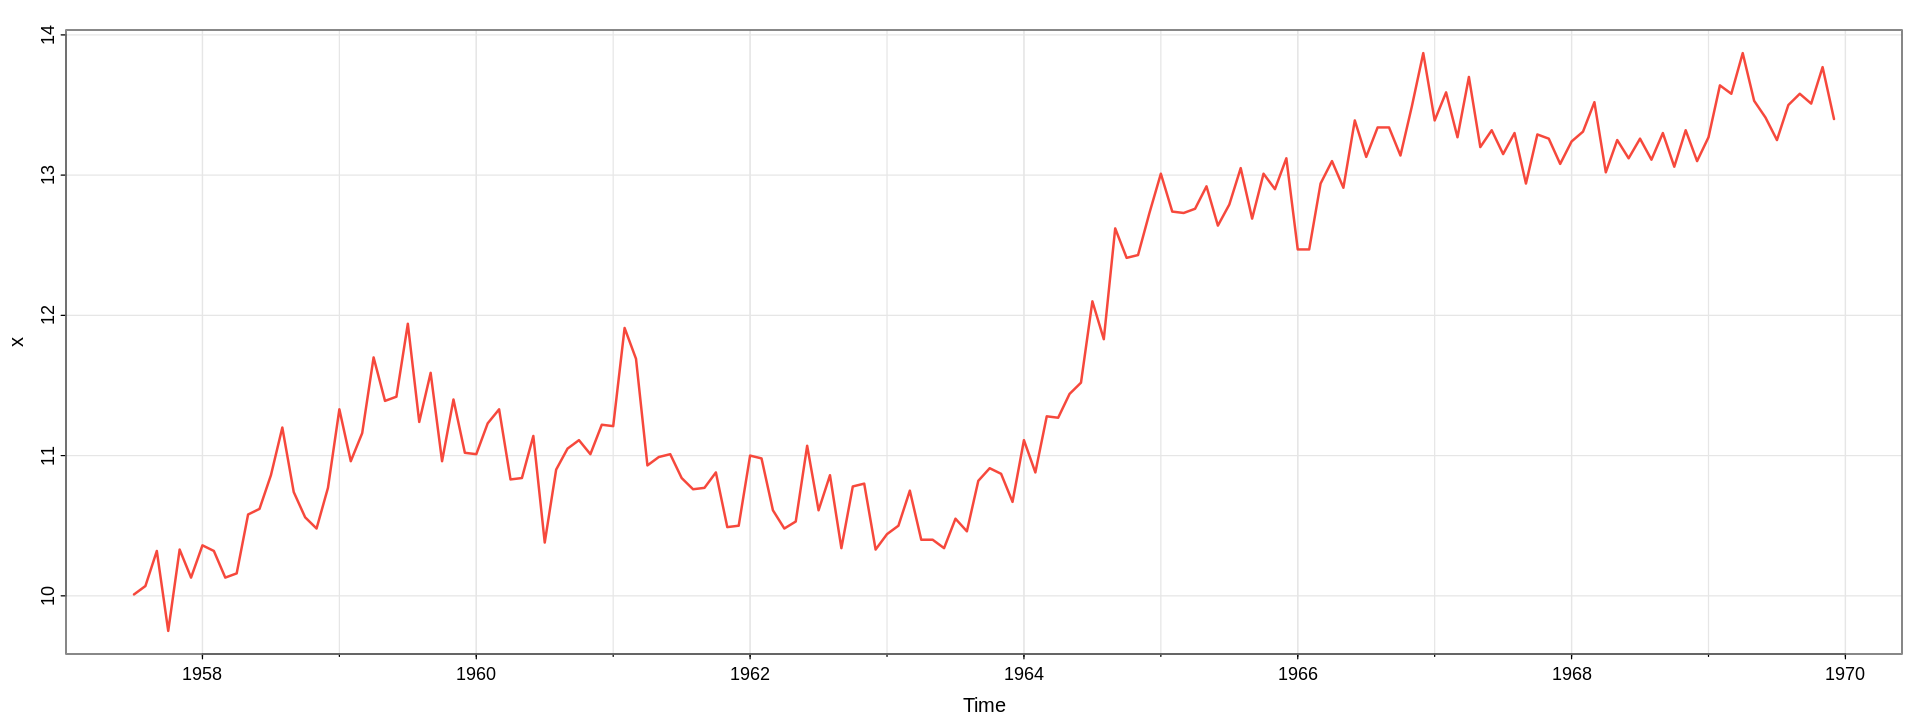

In [64]:
x = ts(lead, start=1957.5, freq=12)
tsplot(x, lwd=2, col=2)

1. Realice un modelo lineal que intente explicar el valor de $y$ (`sales`) directamente a partir del valor de $x$ (`lead`) y analice el resultado.
2. Se puede suponer que las producción (y por consiguiente las ventas) aumentan al aumentar el precio, pero con retardo. para ello se propone.
   1. Considerar las series $\nabla y$  y $\nabla x$ de incrementos de ventas y precio respectivamente.
   2. Realizar un análisis de correlación cruzada entre los mismos, y encontrar el lag entre las series que produce mayor correlación.
    
3. Con el lag obtenido, volver a realizar el ajuste de $y$ pero con la serie $x$ laggeada y comparar con la parte 1. Graficar adecuadamente el resultado.
4. Analizar los residuos y comentar si queda correlación y qué modelo propondría para el resultante (no hacer el modelo).


Buscar el lag en las series diferenciadas y ajustar en funcion de ese lag en las series originales.

In [65]:
t = time(x) - 1957.5

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1957,,,,,,,10.01,10.07,10.32,9.75,10.33,10.13
1958,10.36,10.32,10.13,10.16,10.58,10.62,10.86,11.20,10.74,10.56,10.48,10.77
1959,11.33,10.96,11.16,11.70,11.39,11.42,11.94,11.24,11.59,10.96,11.40,11.02
1960,11.01,11.23,11.33,10.83,10.84,11.14,10.38,10.90,11.05,11.11,11.01,11.22
1961,11.21,11.91,11.69,10.93,10.99,11.01,10.84,10.76,10.77,10.88,10.49,10.50
1962,11.00,10.98,10.61,10.48,10.53,11.07,10.61,10.86,10.34,10.78,10.80,10.33
1963,10.44,10.50,10.75,10.40,10.40,10.34,10.55,10.46,10.82,10.91,10.87,10.67
1964,11.11,10.88,11.28,11.27,11.44,11.52,12.10,11.83,12.62,12.41,12.43,12.73
1965,13.01,12.74,12.73,12.76,12.92,12.64,12.79,13.05,12.69,13.01,12.90,13.12
1966,12.47,12.47,12.94,13.10,12.91,13.39,13.13,13.34,13.34,13.14,13.49,13.87


In [66]:
# Fit the linear model
fit <- lm(y ~ x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.7736  -4.2953   0.2078   5.1369  13.5720 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.8812     5.3308   5.793 4.01e-08 ***
x            16.8060     0.4476  37.544  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.644 on 148 degrees of freedom
Multiple R-squared:  0.905,	Adjusted R-squared:  0.9043 
F-statistic:  1410 on 1 and 148 DF,  p-value: < 2.2e-16


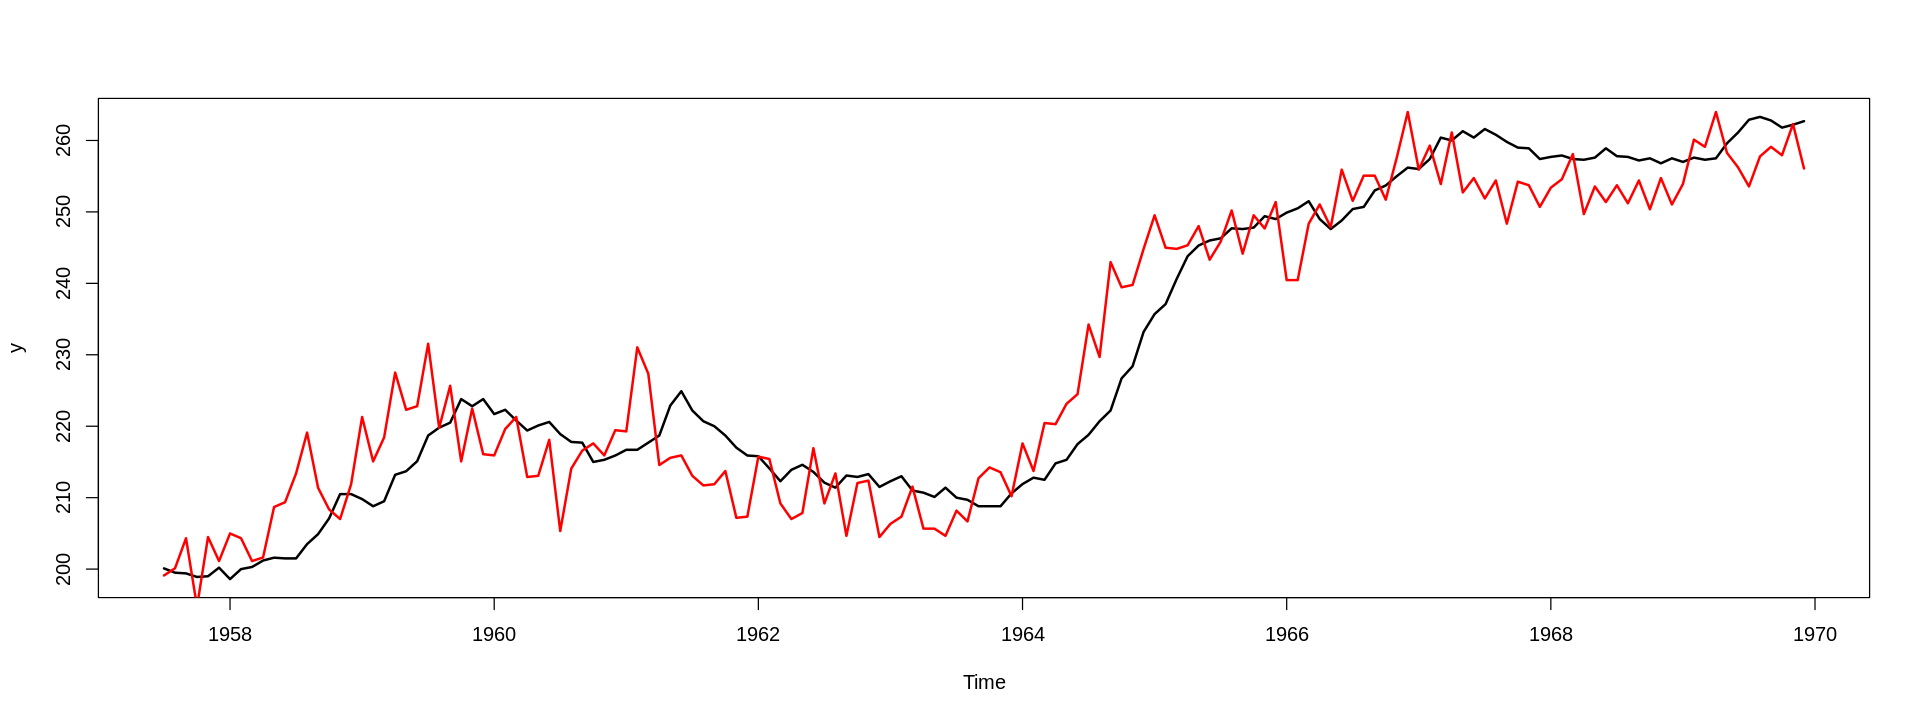

In [68]:
# Compute the predictions
predictions <- ts(fitted(fit),start=1957.5,frequency=12)

# Plot the observed and predicted values
plot(y, type="l", collwd=2)
lines(predictions, col="red", lwd=2)


Con un p-value muy cercano a 0 y un ajuste de un 90.5% la serie lead parece resulta en un buen ajuste para sales.

#### Parte 2


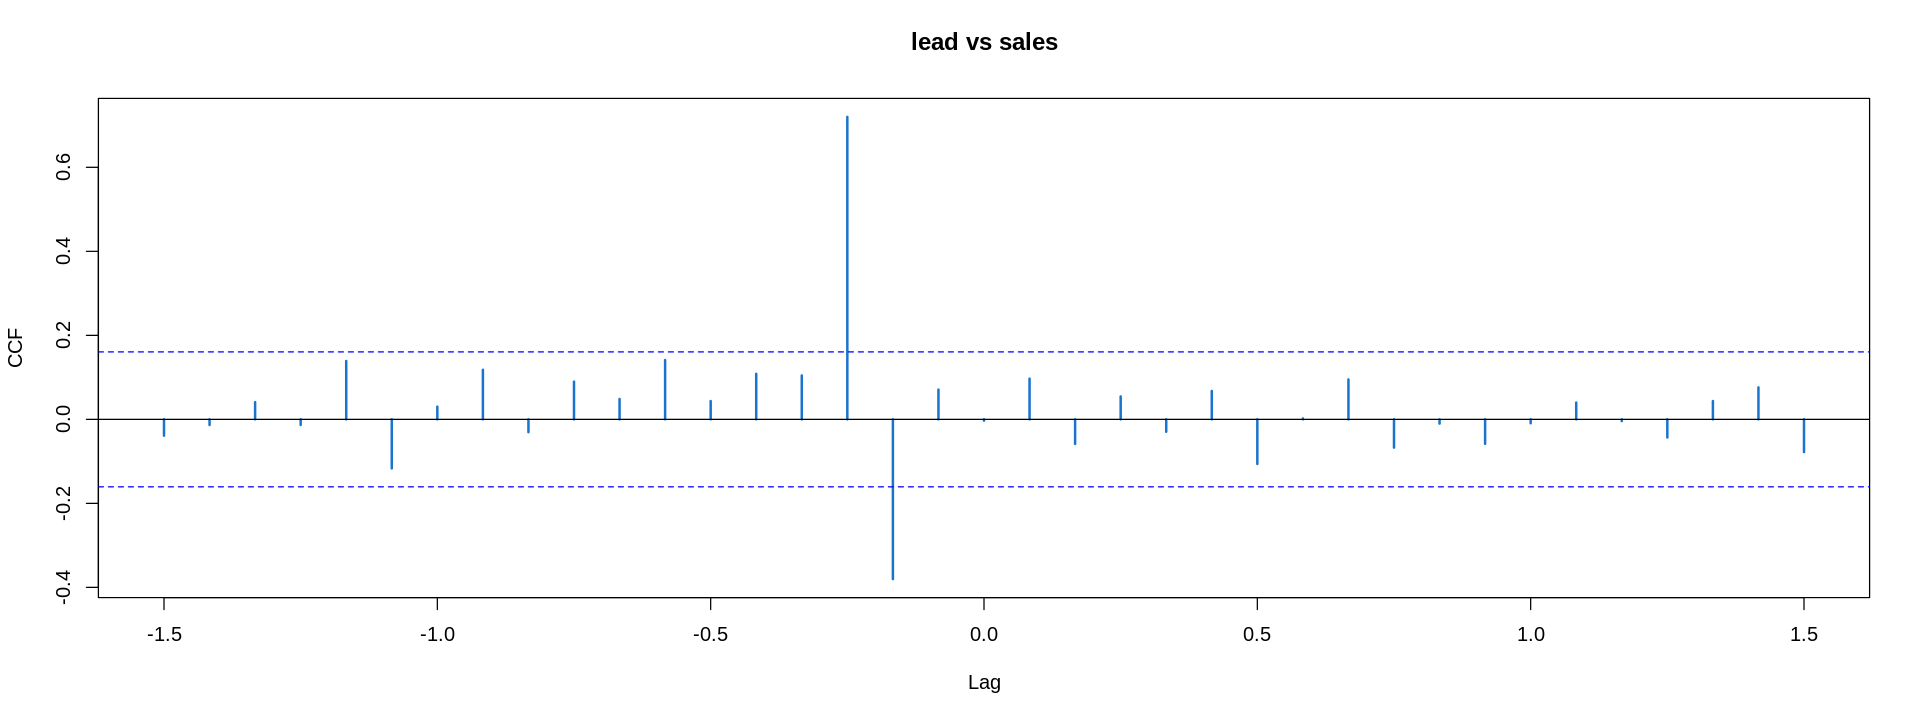

In [71]:
delta_x = diff(x)
delta_y = diff(y)
ccf(delta_x,delta_y,main="lead vs sales",ylab="CCF", col=4, lwd=2)

La correlacion cruzada tiene un pico negativo en -3 meses. Eso indica que la serie lead puede utilizarse para predecir la serie sales usando el valor de 3 meses antes. Voy a hacer esta prueba y luego agregar el valor de la serie con -2 meses para ver si mejora el ajuste.

In [78]:
xL3=lag(x,-3)
sales = ts.intersect(y, xL3, dframe=TRUE)
fit1 <- lm(y ~ xL3, data = sales, na.action=NULL)
summary(fit1)


Call:
lm(formula = y ~ xL3, data = sales, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4134  -2.6261  -0.0499   3.1589   9.2339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.7502     3.3292   7.735  1.6e-12 ***
xL3          17.3426     0.2804  61.846  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.075 on 145 degrees of freedom
Multiple R-squared:  0.9635,	Adjusted R-squared:  0.9632 
F-statistic:  3825 on 1 and 145 DF,  p-value: < 2.2e-16


El ajuste mejora bastante de un 90.5 a un 96.35 de varianza explicada usando la version lagged con 3 meses antes, además de un p-value muy cercano a 0 también.  

In [74]:
xL3=lag(x,-3)
xL2=lag(x,-2)
sales = ts.intersect(y, xL3, xL2 , dframe=TRUE)


fit2 <- lm(y ~ xL3+xL2, data = sales, na.action=NULL)
summary(fit2)


Call:
lm(formula = y ~ xL3 + xL2, data = sales, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3979  -2.2409   0.3184   2.8068   7.0290 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.5502     3.1192   7.550 4.57e-12 ***
xL3          12.5664     0.9976  12.596  < 2e-16 ***
xL2           4.9525     0.9987   4.959 1.97e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.779 on 144 degrees of freedom
Multiple R-squared:  0.9688,	Adjusted R-squared:  0.9684 
F-statistic:  2236 on 2 and 144 DF,  p-value: < 2.2e-16


Añadir un segundo retardo causa un pequeñisimo aumento también en la serie, de un 0.5% de varianza explicada, pero según Pr(>|t|) es significante por lo cual podría mantenerse en el ajuste.

#### Parte 5

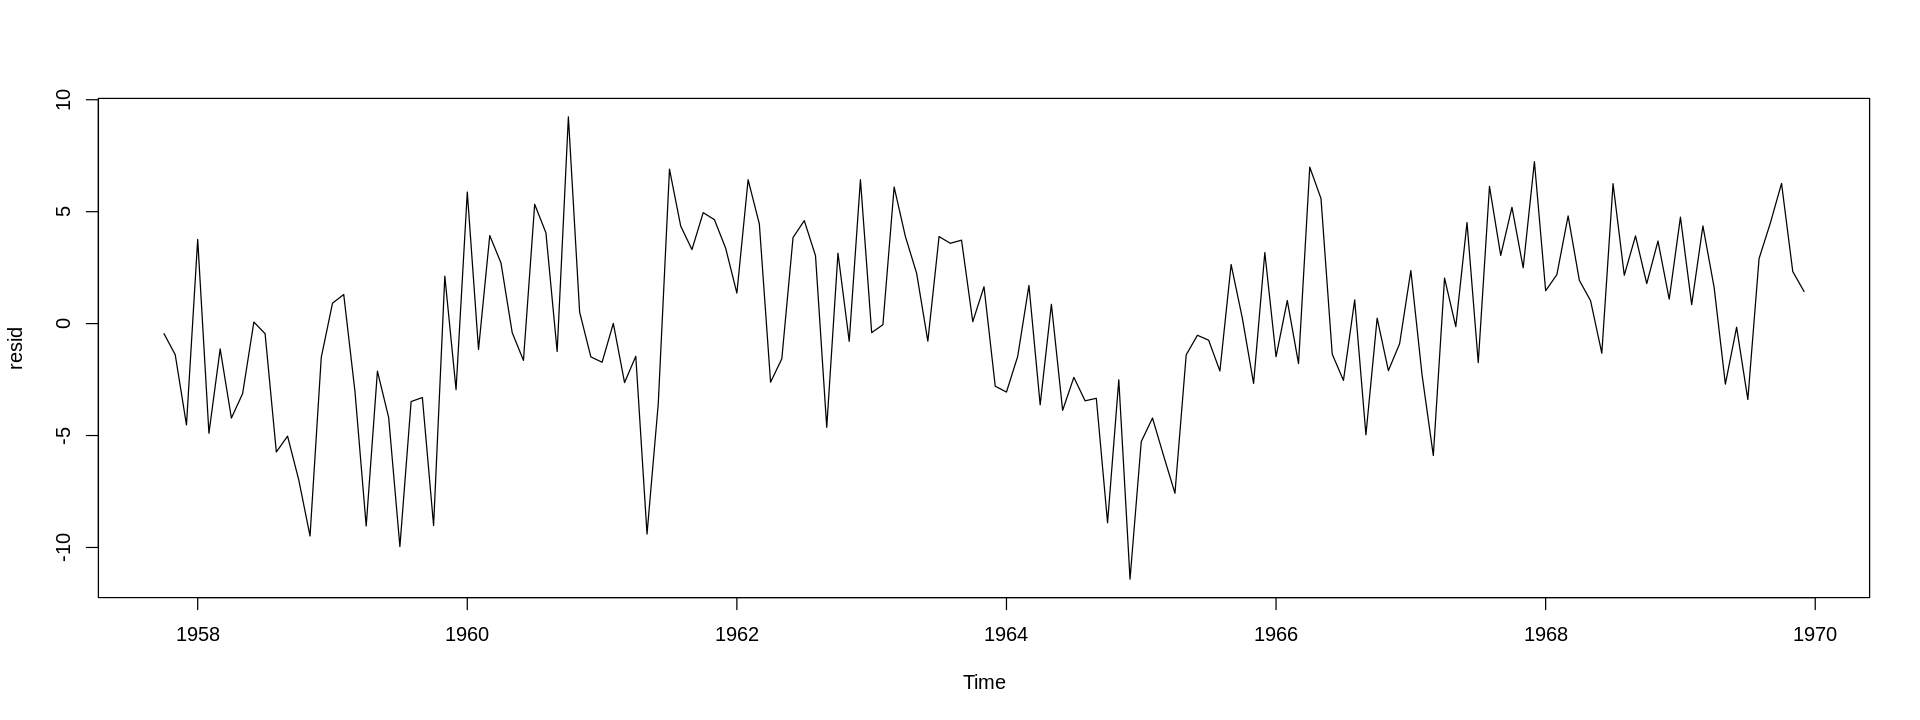


	Box-Ljung test

data:  resid
X-squared = 21.191, df = 1, p-value = 4.157e-06


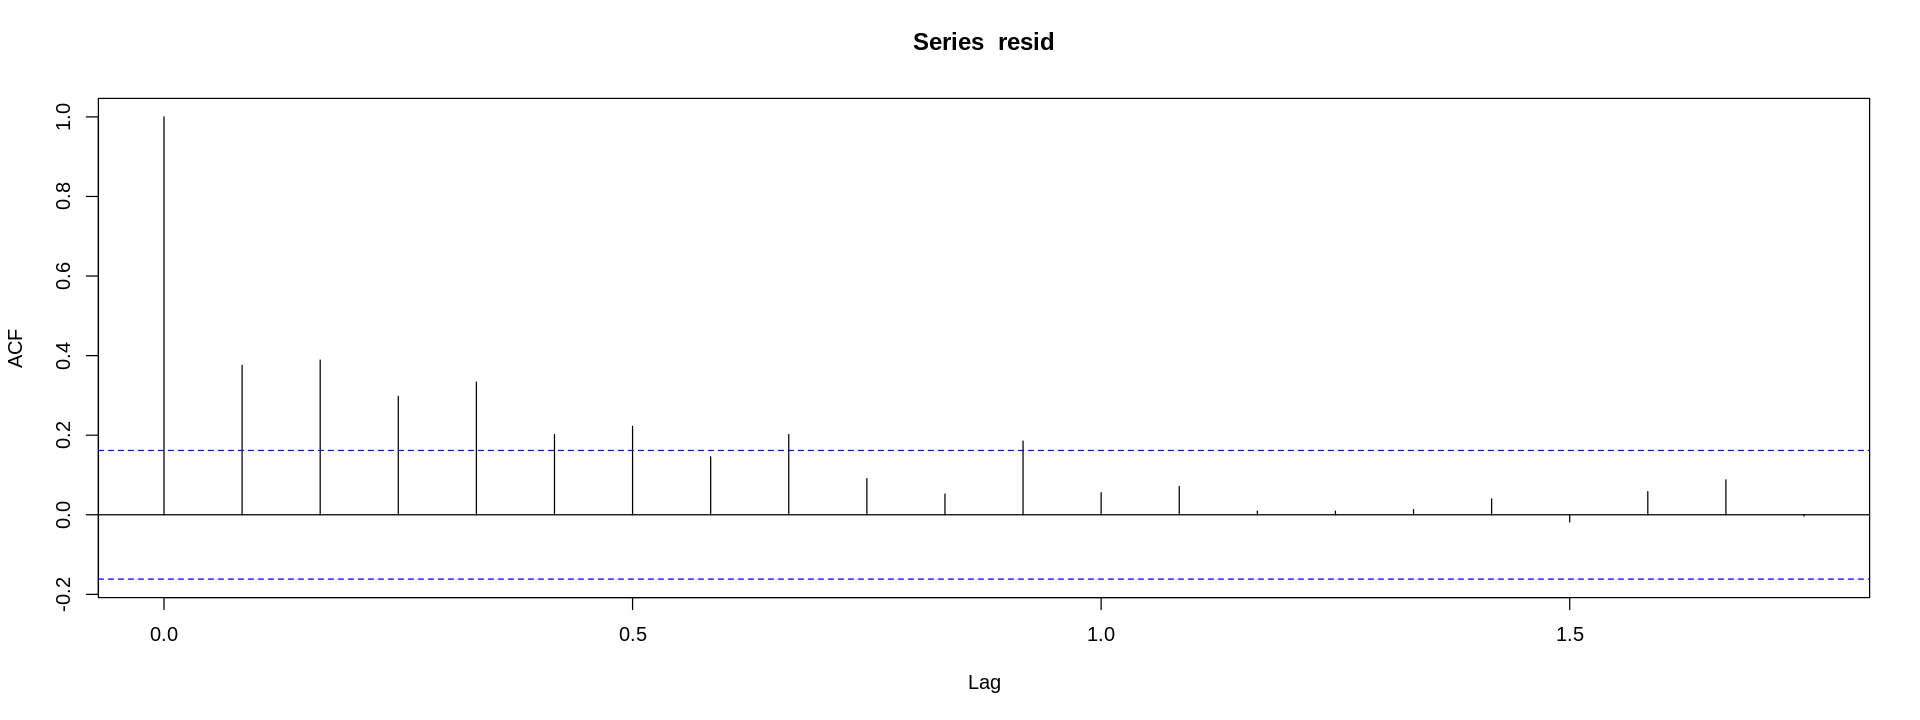

In [80]:
resid <- residuals(fit1)
plot(resid)
acf(resid)
Box.test(resid, type="Ljung-Box")

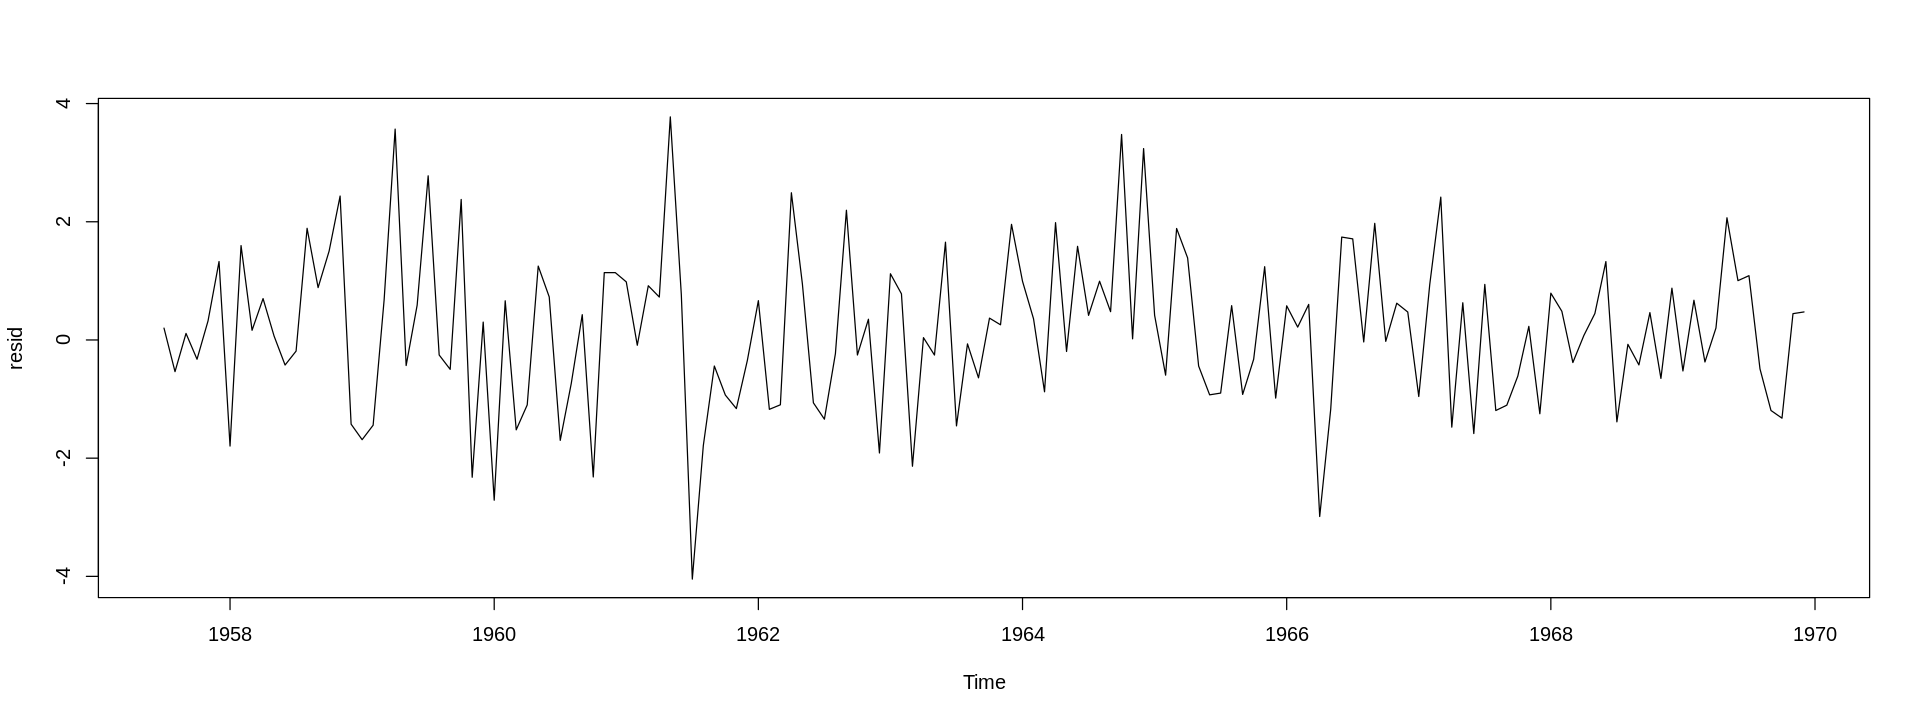


	Box-Ljung test

data:  resid
X-squared = 0.021599, df = 1, p-value = 0.8832


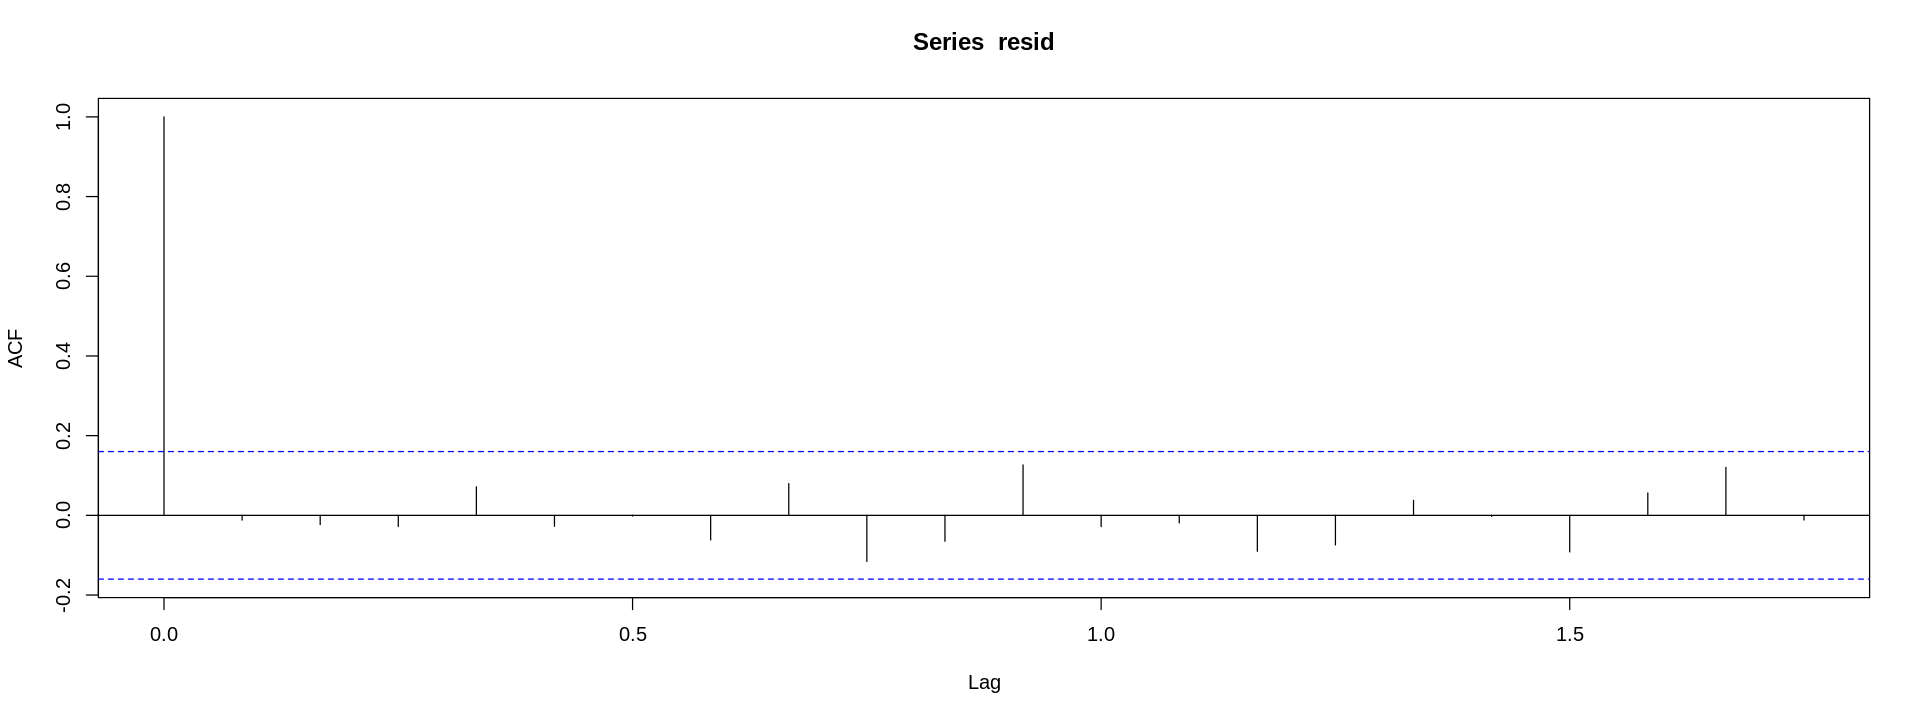

In [81]:
resid <- residuals(fit2)
plot(resid)
acf(resid)
Box.test(resid, type="Ljung-Box")

En el caso del segundo ajuste vemos nuevamente que llegamos a un buen ajuste, debido a que la acf de los residuos se ve como la acf gaussiana de ruido blanco por lo que no tendriamos mas información para sacarle a la serie.

Lo que indujo al segundo modelo fueron estos componentes de la acf del primer ajuste (solo con el segundo retardo) que quedan sobre el nivel de significancia. Y esto se comprueba viendo el segundo que parece más a uno de ruido blanco.